<a href="https://colab.research.google.com/github/viveksinghvic/Yes-bank-stock-closing-price-prediction/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -<b>Yes Bank Stock Closing Price Prediction
</b>


##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**Vivek Singh
##### **Team Member 2 -**Dharani Putta



# **Project Summary -**


Yes Bank, a prominent Indian financial institution, has been in the spotlight due to a high-profile fraud case involving Rana Kapoor. This project aims to explore the impact of this case on Yes Bank's stock prices by analyzing historical stock data. The primary objective is to build predictive models, including time series models, to forecast the monthly closing price of Yes Bank's stock.

By executing this project, we aim to provide insights into how external events, such as the fraud case involving Rana Kapoor, may have influenced Yes Bank's stock prices. Additionally, we seek to evaluate the effectiveness of predictive models in forecasting stock prices under these circumstances, offering valuable information for investors and stakeholders.








# **GitHub Link -**

https://github.com/viveksinghvic/Yes-bank-stock-closing-price-prediction

# **Problem Statement**


**After analysing the given data, build the models to predict the stock's closing price of the month. Which predictive models, and machine learning algorithms, perform best in forecasting Yes Bank's stock prices?**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import necessary libraries
import numpy as np              # Import NumPy for numerical operations
import pandas as pd             # Import Pandas for data manipulation
import matplotlib.pyplot as plt # Import Matplotlib for data visualization
# %matplotlib inline             # Magic command for inline plotting in Jupyter Notebook
import seaborn as sns           # Import Seaborn for enhanced data visualization
import plotly.graph_objects as go  # Import Plotly for interactive plots
from sklearn.model_selection import train_test_split,TimeSeriesSplit# Import train_test_split for data splitting
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV    # Import LinearRegression model
from sklearn.model_selection import GridSearchCV      # Import GridSearchCV for hyperparameter tuning
from xgboost import XGBRegressor         # Import XGBoost library for boosting-based models
from sklearn.ensemble import RandomForestRegressor    # Import RandomForestRegressor for ensemble-based models

from sklearn.metrics import mean_absolute_error, r2_score  # Import metrics for model evaluation

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Import the necessary library to mount Google Drive
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load the dataset from Google Drive into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
# Dataset first view
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#veiwing last rows of 'df' dataframe
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(df.shape)
print(f'The dataset has {df.index.size} rows and {df.columns.size} columns')
print('size of data frame:',df.size)

(185, 5)
The dataset has 185 rows and 5 columns
size of data frame: 925


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,Date,Open,High,Low,Close


No duplicates exist in the dataset

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

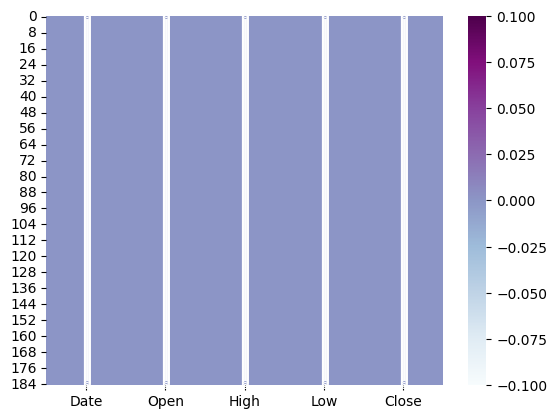

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna(),annot=True,cmap='BuPu')

We can observe that there are no null values in the dataset

### What did you know about your dataset?

This data contains stock prices of Yes Bank, which is a well-known bank in the Indian financial domain. The dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

The main objective is to predict the stock's closing price of the month.

The dataset has 185 rows and 5 columns,
with a size of 925.
And also the dataset has no duplicate and no null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

**Date** : Date of record<br>
**Open** : Opening price<br>
**High** : Highest price in the day<br>
**Low** : Lowest price in the day<br>
**Close** : Closing price

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print('Number of unique values in each variable is listed below:')
df.nunique()

Number of unique values in each variable is listed below:


Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

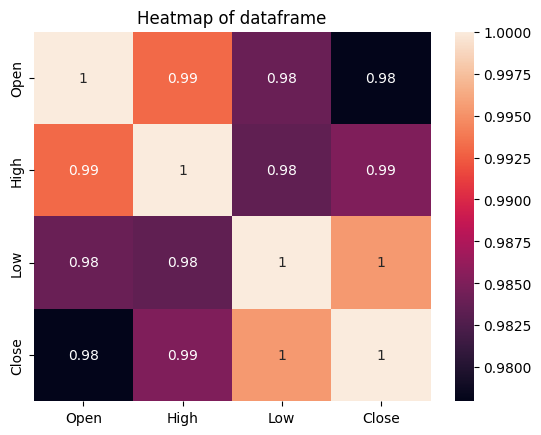

In [ ]:
#visualising correlation between variables
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of dataframe')
plt.show()

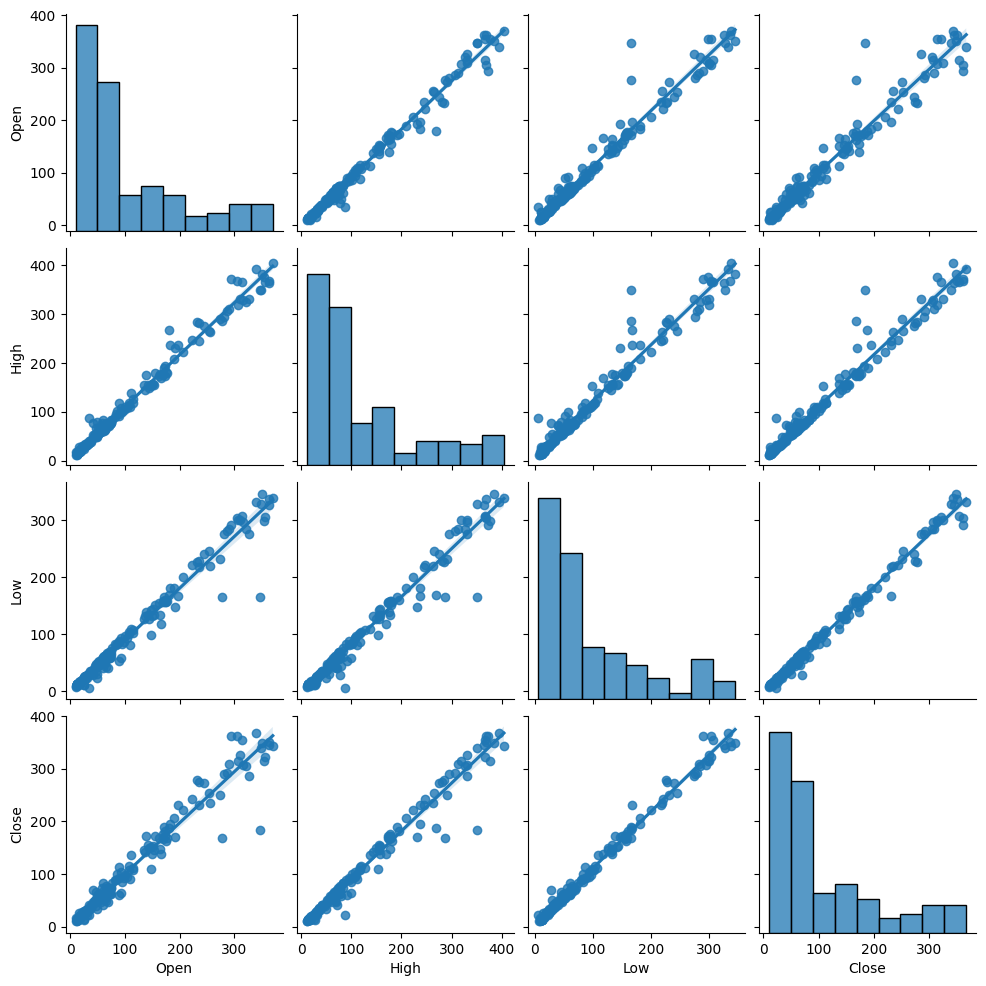

In [ ]:
# Create a pair plot using Seaborn
# A pair plot is a grid of scatterplots for visualizing relationships between numerical variables
# 'df' is the DataFrame containing the data
# 'kind='reg'' adds regression lines to the scatterplots

sns.pairplot(df, kind='reg')

In [ ]:
# Define a function to find outliers using the Interquartile Range (IQR) method
def inter_quartile_range(i):
  # Calculate quartiles (25th, 50th, and 85th percentiles) of the input data 'i'
  quartile = np.quantile(i, [0.25, 0.5, 0.85])
  print('25%, 50%, 85% quantiles:', quartile)

  # Calculate the Interquartile Range (IQR) as the difference between the 75th and 25th percentiles
  iqr = quartile[2] - quartile[0]
  print('IQR (Interquartile Range):', iqr)

  # Calculate the lower and upper fences for outlier detection
  lower_fence = quartile[0] - 1.5 * iqr
  higher_fence = quartile[2] + 1.5 * iqr
  print('Lower fence:', lower_fence)
  print('Higher fence:', higher_fence)

  # Print outliers in the 'Open' column of the DataFrame 'df'
  print('Outliers:')
  for value in df['Open']:
    if value < lower_fence or value > higher_fence:
      print(value)
  else:
    print(0)

In [ ]:
# call 'inter_quartile_range()' to calculate the quartiles, IQR, and detect outliers in the 'Open' column of the DataFrame 'df'
open_quartile=inter_quartile_range(df['Open'])

25%, 50%, 85% quantiles: [ 33.8    62.98  225.968]
IQR (Interquartile Range): 192.16800000000006
Lower fence: -254.45200000000006
Higher fence: 514.2200000000001
Outliers:
0


In [ ]:
# call 'inter_quartile_range()' to calculate the quartiles, IQR, and detect outliers in the 'High' column of the DataFrame 'df'
high_quantile=inter_quartile_range(df['High'])


25%, 50%, 85% quantiles: [ 36.14   72.55  253.396]
IQR (Interquartile Range): 217.25600000000009
Lower fence: -289.74400000000014
Higher fence: 579.2800000000002
Outliers:
0


In [ ]:
# call 'inter_quartile_range()' to calculate the quartiles, IQR, and detect outliers in the 'Low' column of the DataFrame 'df'
low_quantile=inter_quartile_range(df['Low'])

25%, 50%, 85% quantiles: [ 28.51   58.    189.224]
IQR (Interquartile Range): 160.7140000000001
Lower fence: -212.56100000000018
Higher fence: 430.2950000000003
Outliers:
0


In [ ]:
# call 'inter_quartile_range()' to calculate the quartiles, IQR, and detect outliers in the 'Close' column of the DataFrame 'df'
close_quantile=inter_quartile_range(df['Close'])

25%, 50%, 85% quantiles: [ 33.45  62.54 225.26]
IQR (Interquartile Range): 191.81000000000006
Lower fence: -254.2650000000001
Higher fence: 512.9750000000001
Outliers:
0


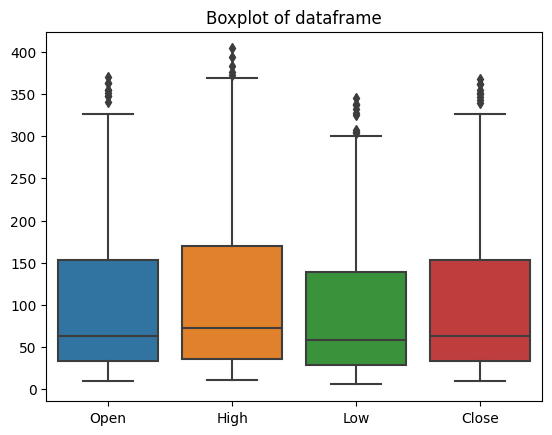

In [ ]:
#visualing outliers in the dataframe
# Create a boxplot to visualize the distribution of data in the entire DataFrame 'df'
# A boxplot helps identify potential outliers and the spread of the data

# Use Seaborn's 'boxplot' function with the entire DataFrame 'df' as input
sns.boxplot(data=df)

# Set the title of the plot
plt.title('Boxplot of dataframe')

# Display the plot
plt.show()

Outliers exist in every column of the dataframe. But it is not advisable to manipulate outliers as stock prices raise and fall in real time.

And manipulating outliers result in wrong output

Distplot of Close variable


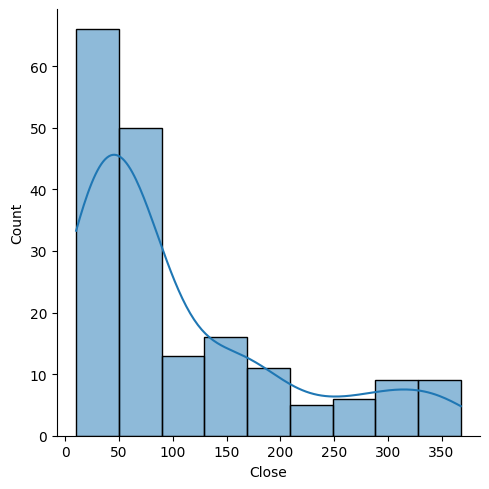

In [ ]:
#univariate analaysis
# Print a descriptive message
print('Distplot of Close variable')

# Create a distribution plot (distplot) to visualize the distribution of the 'Close' variable
# The 'kde=True' argument adds a kernel density estimate to the plot for a smoother distribution curve

# Use Seaborn's 'displot' function with the 'Close' column of the DataFrame 'df' as input
sns.displot(df['Close'], kde=True)

# Display the plot
plt.show()

Line chart of opening and Closing price


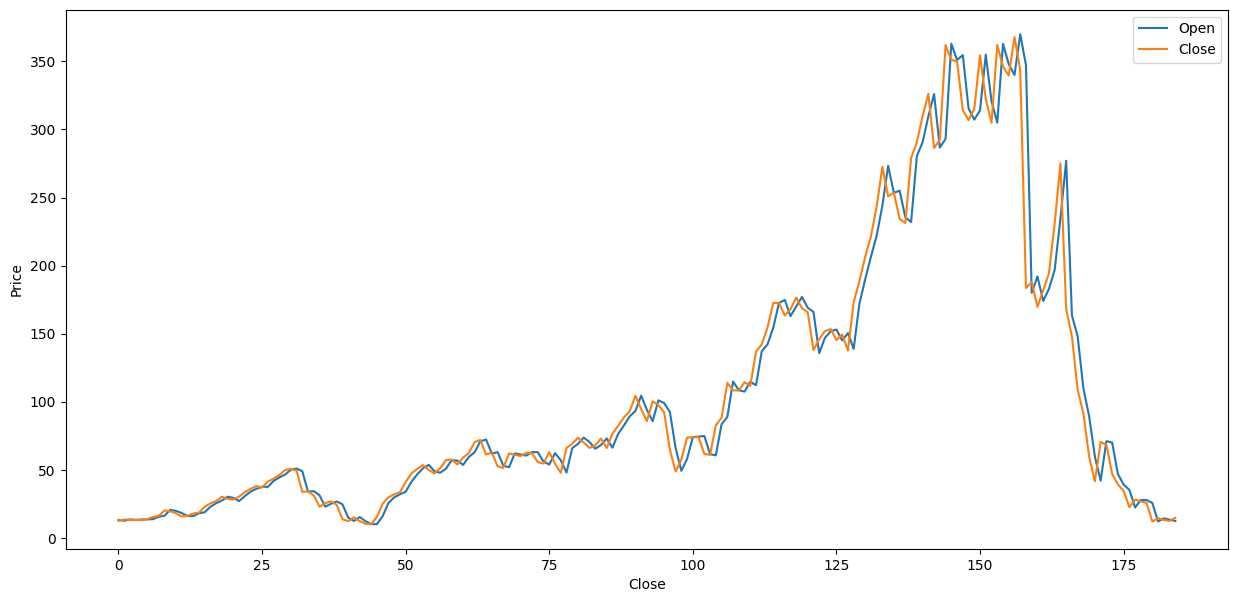

In [ ]:
# Print a descriptive message
print('Line chart of opening and Closing price')

# Create a line chart to visualize the 'Open' and 'Close' prices from the DataFrame 'df'
# Set the figure size to (15, 7) for a larger visualization

# Use DataFrame indexing to select the 'Open' and 'Close' columns and then call the 'plot' method
df[['Open', 'Close']].plot(figsize=(15, 7))

# Set the x-axis label to 'Close'
plt.xlabel('Close')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Display the plot
plt.show()


Line chart of close and high price


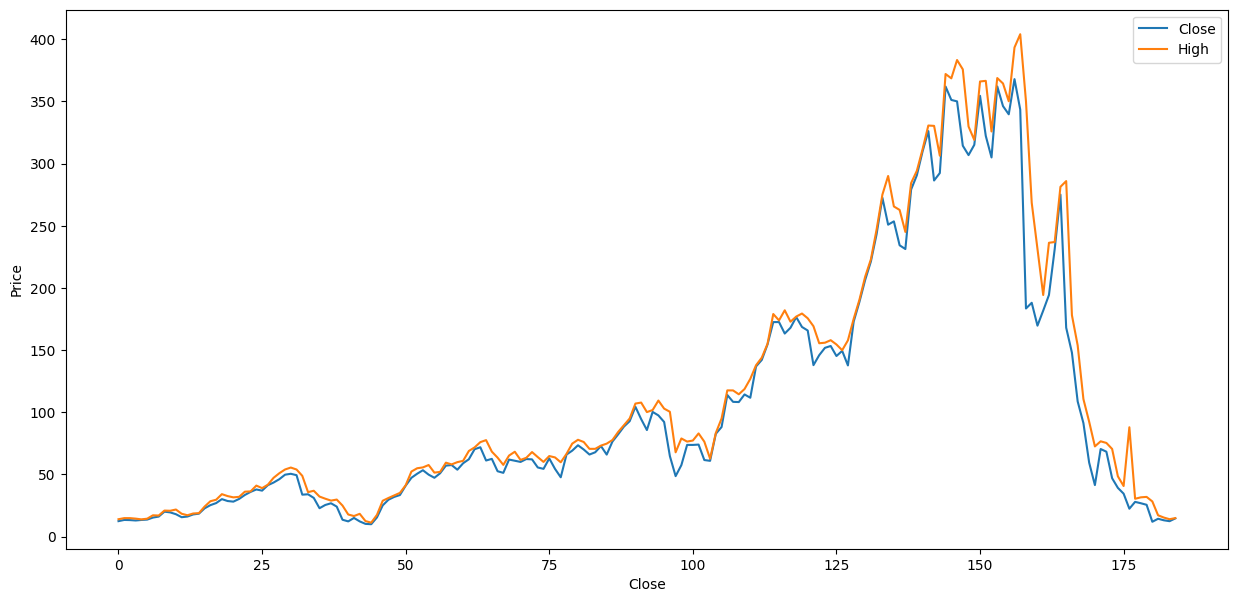

In [ ]:
# Print a descriptive message
print('Line chart of close and high price')

# Create a line chart to visualize the 'Close' and 'High' prices from the DataFrame 'df'
# Set the figure size to (15, 7) for a larger visualization

# Use DataFrame indexing to select the 'Close' and 'High' columns and then call the 'plot' method
df[['Close', 'High']].plot(figsize=(15, 7))

# Set the x-axis label to 'Close'
plt.xlabel('Close')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Display the plot
plt.show()


Line chart of low and high price


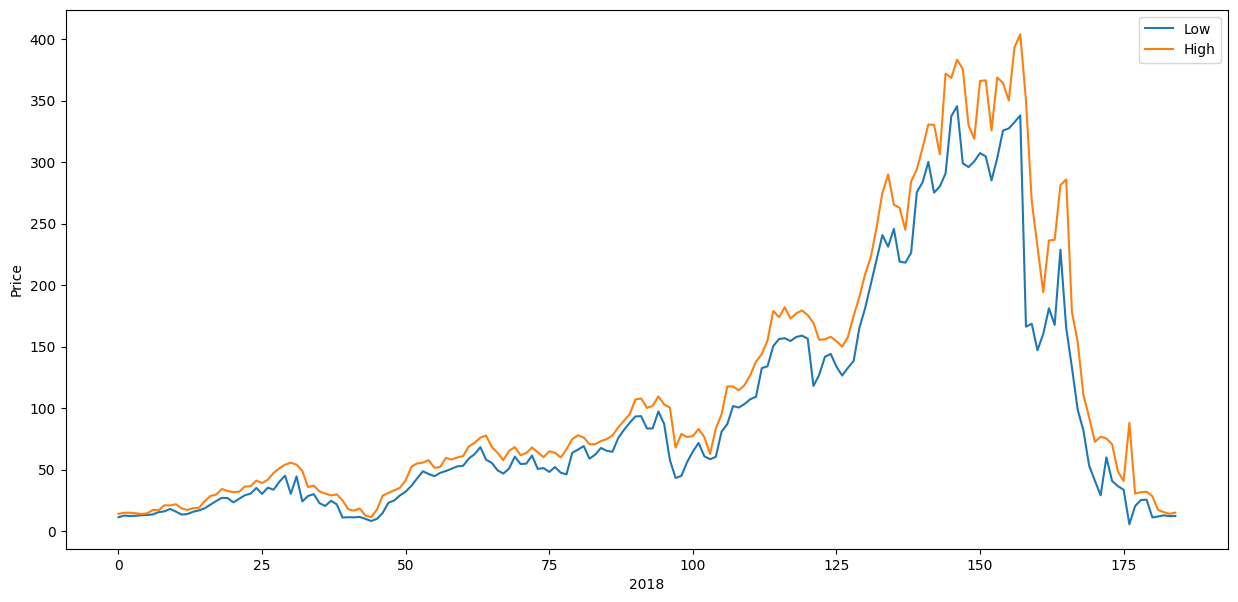

In [ ]:
# Print a descriptive message
print('Line chart of low and high price')

# Create a line chart to visualize the 'Low' and 'High' prices from the DataFrame 'df'
# Set the figure size to (15, 7) for a larger visualization

# Use DataFrame indexing to select the 'Low' and 'High' columns and then call the 'plot' method
df[['Low', 'High']].plot(figsize=(15, 7))

# Set the x-axis label to '2018'
plt.xlabel('2018')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Display the plot
plt.show()


Line chart of low and Close price


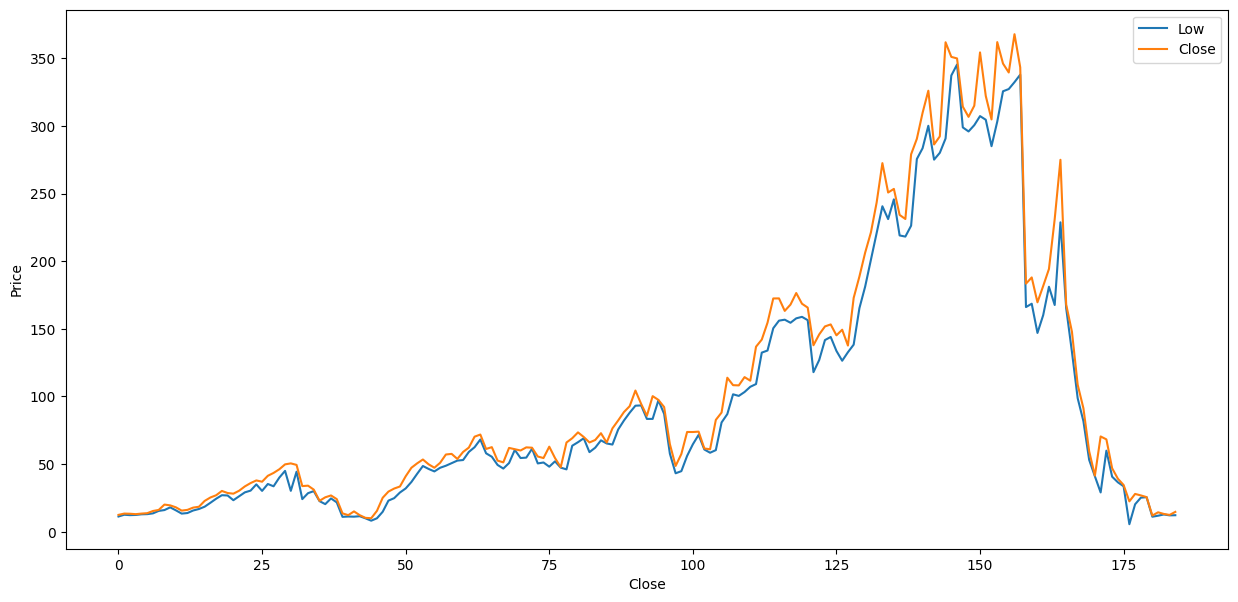

In [ ]:
# Print a descriptive message
print('Line chart of low and Close price')

# Create a line chart to visualize the 'Low' and 'Close' prices from the DataFrame 'df'
# Set the figure size to (15, 7) for a larger visualization

# Use DataFrame indexing to select the 'Low' and 'Close' columns and then call the 'plot' method
df[['Low', 'Close']].plot(figsize=(15, 7))

# Set the x-axis label to 'Close'
plt.xlabel('Close')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Display the plot
plt.show()

In [ ]:
#creating a copy of original dataframe
# Create a new DataFrame 'df_copy' by making a copy of the DataFrame 'df'
df_copy = pd.DataFrame(df)

# Display the first few rows of the 'df_copy' DataFrame using the 'head' method
df_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#creating a new column for month
# Create a new column 'Month' in the 'df_copy' DataFrame
# Extract the first three characters (abbreviated month) from the 'Date' column in the original 'df' DataFrame
df_copy['Month'] = df['Date'].str[:3]

# Create a new column 'Day' in the 'df_copy' DataFrame
# Copy the values from the 'Date' column in the original 'df' DataFrame
df_copy['Day'] = df['Date']

# Display the first few rows of the modified 'df_copy' DataFrame to inspect the changes
df_copy.head()

,Date,Open,High,Low,Close,Month,Day
0,Jul-05,13.00,14.00,11.25,12.46,Jul,Jul-05
1,Aug-05,12.58,14.88,12.55,13.42,Aug,Aug-05
2,Sep-05,13.48,14.87,12.27,13.30,Sep,Sep-05
3,Oct-05,13.20,14.47,12.40,12.99,Oct,Oct-05
4,Nov-05,13.35,13.88,12.88,13.41,Nov,Nov-05


In [ ]:
# Define a dictionary 'month_dict' that maps abbreviated month names to month numbers
month_dict = {
    'Jan': '2018-01', 'Feb': '2018-02', 'Mar': '2018-03', 'Apr': '2018-04',
    'May': '2018-05', 'Jun': '2018-06', 'Jul': '2018-07', 'Aug': '2018-08',
    'Sep': '2018-09', 'Oct': '2018-10', 'Nov': '2018-11', 'Dec': '2018-12'
}

# Modify the 'Date' column in the 'df_copy' DataFrame:
# - Replace abbreviated month names with their corresponding month numbers using 'month_dict'
# - Append the last three characters of the original 'Date' column (the year) to the modified month number
df_copy['Date'] = df['Month'].replace(month_dict) + df_copy['Date'].str[-3:]

# Sort the 'df_copy' DataFrame by the 'Date' column in ascending order
df_copy.sort_values(by=['Date'], inplace=True)

# Reset the index of the 'df_copy' DataFrame
df_copy.reset_index(inplace=True)

# Display the modified 'df_copy' DataFrame
df_copy


,index,Date,Open,High,Low,Close,Month,Day
0,6,2018-01-06,13.68,17.16,13.58,15.33,Jan,Jan-06
1,18,2018-01-07,27.40,34.16,27.00,30.16,Jan,Jan-07
2,30,2018-01-08,49.99,55.56,30.24,50.54,Jan,Jan-08
3,42,2018-01-09,15.28,18.34,11.48,12.24,Jan,Jan-09
4,54,2018-01-10,53.60,57.58,46.42,49.84,Jan,Jan-10
...,...,...,...,...,...,...,...,...
180,125,2018-12-15,153.00,154.52,133.71,145.23,Dec,Dec-15
181,137,2018-12-16,235.40,245.00,218.25,231.26,Dec,Dec-16
182,149,2018-12-17,307.20,319.00,300.65,315.05,Dec,Dec-17
183,161,2018-12-18,174.00,194.30,160.20,181.75,Dec,Dec-18


In [ ]:
# Create a new column 'new' in the 'df_copy' DataFrame
# Generate an array of integers from 1 to 185 (inclusive) using NumPy's 'arange' function
# The 'dtype=object' argument ensures that the elements are stored as objects
df_copy['new'] = np.arange(1, 186, 1, dtype=object)

# Modify the 'Day' column in the 'df_copy' DataFrame:
# - Convert the 'new' column to a string data type using 'astype(str)'
# - Concatenate an underscore '_' and the original 'Day' values to the converted 'new' values
df_copy['Day'] = df_copy['new'].astype(str) + '_' + df_copy['Day']

# Display the modified 'df_copy' DataFrame
df_copy

,index,Date,Open,High,Low,Close,Month,Day,new
0,6,2018-01-06,13.68,17.16,13.58,15.33,Jan,1_Jan-06,1
1,18,2018-01-07,27.40,34.16,27.00,30.16,Jan,2_Jan-07,2
2,30,2018-01-08,49.99,55.56,30.24,50.54,Jan,3_Jan-08,3
3,42,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09,4
4,54,2018-01-10,53.60,57.58,46.42,49.84,Jan,5_Jan-10,5
...,...,...,...,...,...,...,...,...,...
180,125,2018-12-15,153.00,154.52,133.71,145.23,Dec,181_Dec-15,181
181,137,2018-12-16,235.40,245.00,218.25,231.26,Dec,182_Dec-16,182
182,149,2018-12-17,307.20,319.00,300.65,315.05,Dec,183_Dec-17,183
183,161,2018-12-18,174.00,194.30,160.20,181.75,Dec,184_Dec-18,184


In [ ]:
#dropping unwanted columns
df_copy.drop([['index','new']],axis=1,inplace=True)
df_copy


,index,Date,Open,High,Low,Close,Month,Day
0,6,2018-01-06,13.68,17.16,13.58,15.33,Jan,1_Jan-06
1,18,2018-01-07,27.40,34.16,27.00,30.16,Jan,2_Jan-07
2,30,2018-01-08,49.99,55.56,30.24,50.54,Jan,3_Jan-08
3,42,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09
4,54,2018-01-10,53.60,57.58,46.42,49.84,Jan,5_Jan-10
...,...,...,...,...,...,...,...,...
180,125,2018-12-15,153.00,154.52,133.71,145.23,Dec,181_Dec-15
181,137,2018-12-16,235.40,245.00,218.25,231.26,Dec,182_Dec-16
182,149,2018-12-17,307.20,319.00,300.65,315.05,Dec,183_Dec-17
183,161,2018-12-18,174.00,194.30,160.20,181.75,Dec,184_Dec-18


**What is a Candle stick and how does it look?**<br>
A candlestick is a type of price chart used in technical analysis that displays the high, low, open, and closing prices of a security for a specific period.

(https://miro.medium.com/v2/resize:fit:828/format:webp/1*cTBBe_HZgOQ9AHkdrIoofw.png)
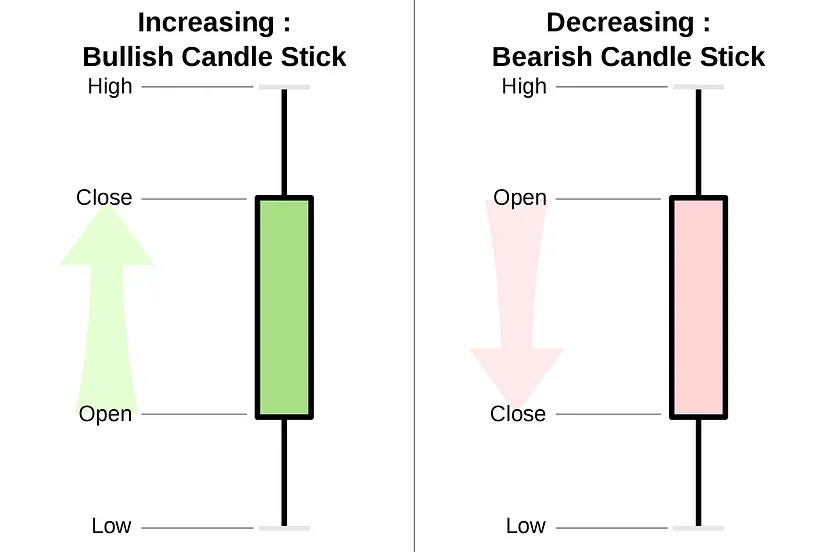

In [ ]:
#Creating Dataframes for each month
def monthly_df(i):
  dummy_df=df_copy[df_copy['Month']==i].reset_index()

  #dropping unwanted column
  dummy_df.drop(['index'],axis=1,inplace=True)
  return dummy_df

In [ ]:
#visualizing stock price
def chart(j):
  fig = go.Figure(data=[go.Candlestick(x=j['Date'],
                  open=j['Open'],
                  high=j['High'],
                  low=j['Low'],
                  close=j['Close'])])
  fig.show()


In [ ]:
def high(j):
  #knowing highest close price in specific month
  print('highest close is',j['Close'].max())

  #finding the details of maximum close price
  return(j[j['Close']==j['Close'].max()])


In [ ]:
def low(j):
  #knowing lowest close price in specific month
  print('lowest close is',j['Close'].min())

  #finding the details of minimum close price
  return(j[j['Close']==j['Close'].min()])


In [ ]:
#multivariate analysis
#plotting candlestick plot for the 'df_copy' dataframe
print('candlestick chart of stock prices ')
fig = go.Figure(data=[go.Candlestick(x=df_copy['Day'],
                  open=df_copy['Open'],
                  high=df_copy['High'],
                  low=df_copy['Low'],
                  close=df_copy['Close']
                                     )])
fig.show()

# Call the 'high' function to create and display a candlestick chart for the 'df_copy' DataFrame
high(df_copy)


candlestick chart of stock prices 


highest close is 367.9


,index,Date,Open,High,Low,Close,Month,Day
103,156,2018-07-18,340.0,393.35,332.45,367.9,Jul,104_Jul-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'df' DataFrame
low(df)

lowest close is 9.98


,Date,Open,High,Low,Close,Month,Day
44,2018-03-09,10.0,11.24,8.16,9.98,Mar,Mar-09


In [ ]:
#stock price movement in the month of January
january_df=monthly_df('Jan')
january_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,0,2018-01-06,13.68,17.16,13.58,15.33,Jan,1_Jan-06
1,1,2018-01-07,27.40,34.16,27.00,30.16,Jan,2_Jan-07
2,2,2018-01-08,49.99,55.56,30.24,50.54,Jan,3_Jan-08
3,3,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09
4,4,2018-01-10,53.60,57.58,46.42,49.84,Jan,5_Jan-10
5,5,2018-01-11,62.98,63.54,49.39,52.59,Jan,6_Jan-11
6,6,2018-01-12,47.92,66.50,46.11,65.99,Jan,7_Jan-12
7,7,2018-01-13,93.20,107.00,93.20,104.41,Jan,8_Jan-13
8,8,2018-01-14,74.74,76.35,60.80,61.59,Jan,9_Jan-14
9,9,2018-01-15,154.40,179.00,150.47,172.50,Jan,10_Jan-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'january_df' DataFrame
print('candlestick chart of stock prices in january')
chart(january_df)

high(january_df)


candlestick chart of stock prices in january


highest close is 354.45


,level_0,Date,Open,High,Low,Close,Month,Day
12,12,2018-01-18,314.0,366.0,307.35,354.45,Jan,13_Jan-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'january_df' DataFrame
low(january_df)

lowest close is 12.24


,level_0,Date,Open,High,Low,Close,Month,Day
3,3,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09


In [ ]:
#stock price movement in the month of february
february_df=monthly_df('Feb')
february_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,15,2018-02-06,15.50,16.97,15.40,16.12,Feb,16_Feb-06
1,16,2018-02-07,30.20,32.60,26.80,28.63,Feb,17_Feb-07
2,17,2018-02-08,50.88,53.97,44.40,49.42,Feb,18_Feb-08
3,18,2018-02-09,12.19,12.50,9.90,10.26,Feb,19_Feb-09
4,19,2018-02-10,49.00,51.48,44.60,47.32,Feb,20_Feb-10
5,20,2018-02-11,53.00,57.69,46.71,51.29,Feb,21_Feb-11
6,21,2018-02-12,65.90,74.80,63.60,69.14,Feb,22_Feb-12
7,22,2018-02-13,104.41,107.80,93.40,94.50,Feb,23_Feb-13
8,23,2018-02-14,61.54,62.70,58.42,60.95,Feb,24_Feb-14
9,24,2018-02-15,172.50,173.88,156.10,172.55,Feb,25_Feb-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'february_df' DataFrame
print('candlestick chart of stock prices in february')
chart(february_df)

high(february_df)


candlestick chart of stock prices in february


highest close is 322.25


,level_0,Date,Open,High,Low,Close,Month,Day
12,27,2018-02-18,355.0,366.5,304.65,322.25,Feb,28_Feb-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'february_df' DataFrame
low(february_df)

lowest close is 10.26


,level_0,Date,Open,High,Low,Close,Month,Day
3,18,2018-02-09,12.19,12.5,9.9,10.26,Feb,19_Feb-09


In [ ]:
#stock price movement in the month of march
march_df=monthly_df('Mar')
march_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,30,2018-03-06,16.20,20.95,16.02,20.08,Mar,31_Mar-06
1,31,2018-03-07,29.30,31.58,23.31,28.14,Mar,32_Mar-07
2,32,2018-03-08,48.90,48.90,24.11,33.75,Mar,33_Mar-08
3,33,2018-03-09,10.00,11.24,8.16,9.98,Mar,34_Mar-09
4,34,2018-03-10,47.80,52.06,47.30,50.97,Mar,35_Mar-10
5,35,2018-03-11,51.84,65.20,50.80,61.98,Mar,36_Mar-11
6,36,2018-03-12,69.00,77.88,66.20,73.46,Mar,37_Mar-12
7,37,2018-03-13,94.00,100.15,83.42,85.71,Mar,38_Mar-13
8,38,2018-03-14,60.52,83.36,60.34,82.70,Mar,39_Mar-14
9,39,2018-03-15,174.80,182.00,156.80,163.31,Mar,40_Mar-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'march_df' DataFrame
print('candlestick chart of stock prices in march')
chart(march_df)

high(march_df)


candlestick chart of stock prices in march


highest close is 309.82


,level_0,Date,Open,High,Low,Close,Month,Day
11,41,2018-03-17,290.6,311.57,283.6,309.82,Mar,42_Mar-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'march_df' DataFrame
low(march_df)

lowest close is 9.98


,level_0,Date,Open,High,Low,Close,Month,Day
3,33,2018-03-09,10.0,11.24,8.16,9.98,Mar,34_Mar-09


In [ ]:
#stock price movement in the month of april
april_df=monthly_df('Apr')
april_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,45,2018-04-06,20.56,20.80,18.02,19.49,Apr,46_Apr-06
1,46,2018-04-07,27.00,31.99,26.20,30.31,Apr,47_Apr-07
2,47,2018-04-08,33.90,35.80,28.51,34.06,Apr,48_Apr-08
3,48,2018-04-09,10.04,17.51,9.94,15.45,Apr,49_Apr-09
4,49,2018-04-10,50.67,59.48,48.80,57.10,Apr,50_Apr-10
5,50,2018-04-11,62.00,68.26,60.50,61.02,Apr,51_Apr-11
6,51,2018-04-12,73.62,76.10,69.11,70.07,Apr,52_Apr-12
7,52,2018-04-13,85.70,101.80,83.43,100.28,Apr,53_Apr-13
8,53,2018-04-14,83.45,94.98,80.80,88.14,Apr,54_Apr-14
9,54,2018-04-15,162.80,172.80,154.53,167.96,Apr,55_Apr-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'april_df' DataFrame
print('candlestick chart of stock prices in april')
chart(april_df)

high(april_df)


candlestick chart of stock prices in april


highest close is 362.05


,level_0,Date,Open,High,Low,Close,Month,Day
12,57,2018-04-18,305.0,368.75,303.3,362.05,Apr,58_Apr-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'low_df' DataFrame
low(april_df)

lowest close is 15.45


,level_0,Date,Open,High,Low,Close,Month,Day
3,48,2018-04-09,10.04,17.51,9.94,15.45,Apr,49_Apr-09


In [ ]:
#stock price movement in the month of May
may_df=monthly_df('May')
may_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,60,2018-05-06,19.80,21.80,15.80,18.03,May,61_May-06
1,61,2018-05-07,30.66,36.14,29.11,33.51,May,62_May-07
2,62,2018-05-08,34.30,36.88,30.03,31.13,May,63_May-08
3,63,2018-05-09,15.94,28.84,14.76,25.12,May,64_May-09
4,64,2018-05-10,56.94,58.08,50.66,57.57,May,65_May-10
5,65,2018-05-11,61.26,61.68,54.50,60.07,May,66_May-11
6,66,2018-05-12,70.40,70.59,58.85,66.02,May,67_May-12
7,67,2018-05-13,100.99,109.43,97.20,97.49,May,68_May-13
8,68,2018-05-14,88.80,117.60,86.98,113.89,May,69_May-14
9,69,2018-05-15,170.00,176.96,157.80,176.52,May,70_May-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'may_df' DataFrame
print('candlestick chart of stock prices in may')
chart(may_df)

high(may_df)


candlestick chart of stock prices in may


highest close is 346.2


,level_0,Date,Open,High,Low,Close,Month,Day
12,72,2018-05-18,362.85,364.4,325.7,346.2,May,73_May-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'may_df' DataFrame
low(may_df)

lowest close is 18.03


,level_0,Date,Open,High,Low,Close,Month,Day
0,60,2018-05-06,19.8,21.8,15.8,18.03,May,61_May-06


In [ ]:
#stock price movement in the month of June
june_df=monthly_df('Jun')
june_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,75,2018-06-06,18.20,18.40,13.40,15.62,Jun,76_Jun-06
1,76,2018-06-07,33.89,36.38,30.40,35.98,Jun,77_Jun-07
2,77,2018-06-08,31.22,32.22,22.62,22.85,Jun,78_Jun-08
3,78,2018-06-09,25.60,31.08,23.00,29.68,Jun,79_Jun-09
4,79,2018-06-10,56.70,59.90,52.60,53.83,Jun,80_Jun-10
5,80,2018-06-11,60.40,63.39,54.80,62.38,Jun,81_Jun-11
6,81,2018-06-12,65.45,70.60,62.14,67.83,Jun,82_Jun-12
7,82,2018-06-13,99.00,102.94,87.15,92.20,Jun,83_Jun-13
8,83,2018-06-14,114.80,117.57,101.62,108.38,Jun,84_Jun-14
9,84,2018-06-15,177.00,179.40,158.90,168.60,Jun,85_Jun-15


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'june_df' DataFrame
print('candlestick chart of stock prices in june')
chart(june_df)

high(june_df)


candlestick chart of stock prices in june


highest close is 339.6


,level_0,Date,Open,High,Low,Close,Month,Day
12,87,2018-06-18,348.0,350.1,327.35,339.6,Jun,88_Jun-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'june_df' DataFrame
low(june_df)

lowest close is 15.62


,level_0,Date,Open,High,Low,Close,Month,Day
0,75,2018-06-06,18.2,18.4,13.4,15.62,Jun,76_Jun-06


In [ ]:
#stock price movement in the month of July
july_df=monthly_df('Jul')
july_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,90,2018-07-05,13.00,14.00,11.25,12.46,Jul,91_Jul-05
1,91,2018-07-06,16.00,17.20,13.82,16.16,Jul,92_Jul-06
2,92,2018-07-07,35.98,41.04,35.02,37.93,Jul,93_Jul-07
3,93,2018-07-08,22.85,30.50,20.40,25.45,Jul,94_Jul-08
4,94,2018-07-09,29.70,33.16,24.83,31.93,Jul,95_Jul-09
5,95,2018-07-10,53.55,60.94,53.02,58.99,Jul,96_Jul-10
6,96,2018-07-11,63.00,68.00,61.36,62.13,Jul,97_Jul-11
7,97,2018-07-12,68.15,73.19,67.57,72.85,Jul,98_Jul-12
8,98,2018-07-13,92.40,100.40,57.71,64.76,Jul,99_Jul-13
9,99,2018-07-14,108.43,114.46,100.44,108.21,Jul,100_Jul-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'july_df' DataFrame
print('candlestick chart of stock prices in july')
chart(july_df)

high(july_df)


candlestick chart of stock prices in july


highest close is 367.9


,level_0,Date,Open,High,Low,Close,Month,Day
13,103,2018-07-18,340.0,393.35,332.45,367.9,Jul,104_Jul-18


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'july_df' DataFrame
low(july_df)

lowest close is 11.95


,level_0,Date,Open,High,Low,Close,Month,Day
15,105,2018-07-20,25.6,28.3,11.1,11.95,Jul,106_Jul-20


In [ ]:
#stock price movement in the month of august
august_df=monthly_df('Aug')
august_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,106,2018-08-05,12.58,14.88,12.55,13.42,Aug,107_Aug-05
1,107,2018-08-06,15.90,18.60,15.70,17.84,Aug,108_Aug-06
2,108,2018-08-07,37.50,39.00,30.20,36.99,Aug,109_Aug-07
3,109,2018-08-08,25.00,28.98,24.62,26.83,Aug,110_Aug-08
4,110,2018-08-09,31.98,35.18,29.00,33.45,Aug,111_Aug-09
5,111,2018-08-10,59.40,68.88,59.01,62.22,Aug,112_Aug-10
6,112,2018-08-11,62.90,63.96,50.51,55.61,Aug,113_Aug-11
7,113,2018-08-12,73.00,74.78,65.27,65.97,Aug,114_Aug-12
8,114,2018-08-13,66.00,67.81,43.22,48.65,Aug,115_Aug-13
9,115,2018-08-14,107.40,118.69,103.31,114.33,Aug,116_Aug-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'august_df' DataFrame
print('candlestick chart of stock prices in august')
chart(august_df)

high(august_df)


candlestick chart of stock prices in august


highest close is 351.15


,level_0,Date,Open,High,Low,Close,Month,Day
12,118,2018-08-17,363.0,368.52,337.37,351.15,Aug,119_Aug-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'august_df' DataFrame
low(august_df)

lowest close is 13.42


,level_0,Date,Open,High,Low,Close,Month,Day
0,106,2018-08-05,12.58,14.88,12.55,13.42,Aug,107_Aug-05


In [ ]:
#stock price movement in the month of september
september_df=monthly_df('Sep')
september_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,122,2018-09-05,13.48,14.87,12.27,13.30,Sep,123_Sep-05
1,123,2018-09-06,18.00,18.88,16.80,18.46,Sep,124_Sep-06
2,124,2018-09-07,37.40,41.75,35.30,41.36,Sep,125_Sep-07
3,125,2018-09-08,26.68,29.80,21.70,24.13,Sep,126_Sep-08
4,126,2018-09-09,33.80,41.30,32.00,40.99,Sep,127_Sep-09
5,127,2018-09-10,62.80,71.74,62.51,70.30,Sep,128_Sep-10
6,128,2018-09-11,56.00,60.08,51.20,54.50,Sep,129_Sep-11
7,129,2018-09-12,66.20,77.69,64.46,76.44,Sep,130_Sep-12
8,130,2018-09-13,49.20,78.94,44.80,57.50,Sep,131_Sep-13
9,131,2018-09-14,114.60,126.85,107.18,111.70,Sep,132_Sep-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'september_df' DataFrame
print('candlestick chart of stock prices in september')
chart(september_df)

high(september_df)


candlestick chart of stock prices in september


highest close is 350.0


,level_0,Date,Open,High,Low,Close,Month,Day
12,134,2018-09-17,351.0,383.25,345.5,350.0,Sep,135_Sep-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'september_df' DataFrame
low(september_df)

lowest close is 13.15


,level_0,Date,Open,High,Low,Close,Month,Day
15,137,2018-09-20,14.3,15.34,12.75,13.15,Sep,138_Sep-20


In [ ]:
#stock price movement in the month of october
october_df=monthly_df('Oct')
october_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,138,2018-10-05,13.20,14.47,12.40,12.99,Oct,139_Oct-05
1,139,2018-10-06,18.78,24.20,18.50,22.78,Oct,140_Oct-06
2,140,2018-10-07,41.80,47.30,33.60,43.48,Oct,141_Oct-07
3,141,2018-10-08,24.60,25.00,11.01,13.58,Oct,142_Oct-08
4,142,2018-10-09,41.20,52.34,36.80,47.31,Oct,143_Oct-09
5,143,2018-10-10,70.90,76.00,68.21,71.86,Oct,144_Oct-10
6,144,2018-10-11,53.80,64.80,48.10,62.90,Oct,145_Oct-11
7,145,2018-10-12,76.40,84.20,75.60,82.29,Oct,146_Oct-12
8,146,2018-10-13,58.00,76.44,56.08,73.76,Oct,147_Oct-13
9,147,2018-10-14,112.10,137.80,109.20,136.83,Oct,148_Oct-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'october_df' DataFrame
print('candlestick chart of stock prices in october')
chart(october_df)

high(october_df)


candlestick chart of stock prices in october


highest close is 314.35


,level_0,Date,Open,High,Low,Close,Month,Day
12,150,2018-10-17,354.6,375.75,299.0,314.35,Oct,151_Oct-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'october_df' DataFrame
low(october_df)

lowest close is 12.42


,level_0,Date,Open,High,Low,Close,Month,Day
15,153,2018-10-20,13.3,14.01,12.11,12.42,Oct,154_Oct-20


In [ ]:
#stock price movement in the month of November
november_df=monthly_df('Nov')
november_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,154,2018-11-05,13.35,13.88,12.88,13.41,Nov,155_Nov-05
1,155,2018-11-06,22.80,28.47,21.40,25.32,Nov,156_Nov-06
2,156,2018-11-07,44.40,50.98,40.02,46.18,Nov,157_Nov-07
3,157,2018-11-08,14.79,17.80,11.25,12.26,Nov,158_Nov-08
4,158,2018-11-09,46.58,54.98,42.84,50.57,Nov,159_Nov-09
5,159,2018-11-10,72.20,77.60,58.00,61.21,Nov,160_Nov-10
6,160,2018-11-11,62.20,63.70,52.04,54.49,Nov,161_Nov-11
7,161,2018-11-12,82.54,89.60,82.22,88.48,Nov,162_Nov-12
8,162,2018-11-13,74.00,77.27,64.65,73.74,Nov,163_Nov-13
9,163,2018-11-14,137.10,143.91,132.44,142.08,Nov,164_Nov-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'november_df' DataFrame
print('candlestick chart of stock prices in november')
chart(november_df)

high(november_df)


candlestick chart of stock prices in november


highest close is 306.8


,level_0,Date,Open,High,Low,Close,Month,Day
12,166,2018-11-17,315.5,329.8,296.0,306.8,Nov,167_Nov-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'november_df' DataFrame
low(november_df)

lowest close is 12.26


,level_0,Date,Open,High,Low,Close,Month,Day
3,157,2018-11-08,14.79,17.8,11.25,12.26,Nov,158_Nov-08


In [ ]:
#stock price movement in the month of december
december_df=monthly_df('Dec')
december_df

,level_0,Date,Open,High,Low,Close,Month,Day
0,170,2018-12-05,13.49,14.44,13.00,13.71,Dec,171_Dec-05
1,171,2018-12-06,25.40,29.66,24.40,26.97,Dec,172_Dec-06
2,172,2018-12-07,46.40,54.00,45.00,49.81,Dec,173_Dec-07
3,173,2018-12-08,12.40,16.56,11.13,15.03,Dec,174_Dec-08
4,174,2018-12-09,50.98,55.67,48.60,53.41,Dec,175_Dec-09
5,175,2018-12-10,61.80,68.36,55.44,62.54,Dec,176_Dec-10
6,176,2018-12-11,57.00,59.80,47.40,47.72,Dec,177_Dec-11
7,177,2018-12-12,89.20,95.00,88.01,92.84,Dec,178_Dec-12
8,178,2018-12-13,74.40,83.00,71.63,74.02,Dec,179_Dec-13
9,179,2018-12-14,142.08,155.00,134.00,154.57,Dec,180_Dec-14


In [ ]:
# Call the 'chart' and 'high' function to create and display a candlestick chart for the 'december_df' DataFrame
print('candlestick chart of stock prices in december')
chart(december_df)

high(december_df)


candlestick chart of stock prices in december


highest close is 315.05


,level_0,Date,Open,High,Low,Close,Month,Day
12,182,2018-12-17,307.2,319.0,300.65,315.05,Dec,183_Dec-17


In [ ]:
# Call the 'low' function to create and display a candlestick chart for the 'december_df' DataFrame
low(december_df)

lowest close is 13.71


,level_0,Date,Open,High,Low,Close,Month,Day
0,170,2018-12-05,13.49,14.44,13.0,13.71,Dec,171_Dec-05


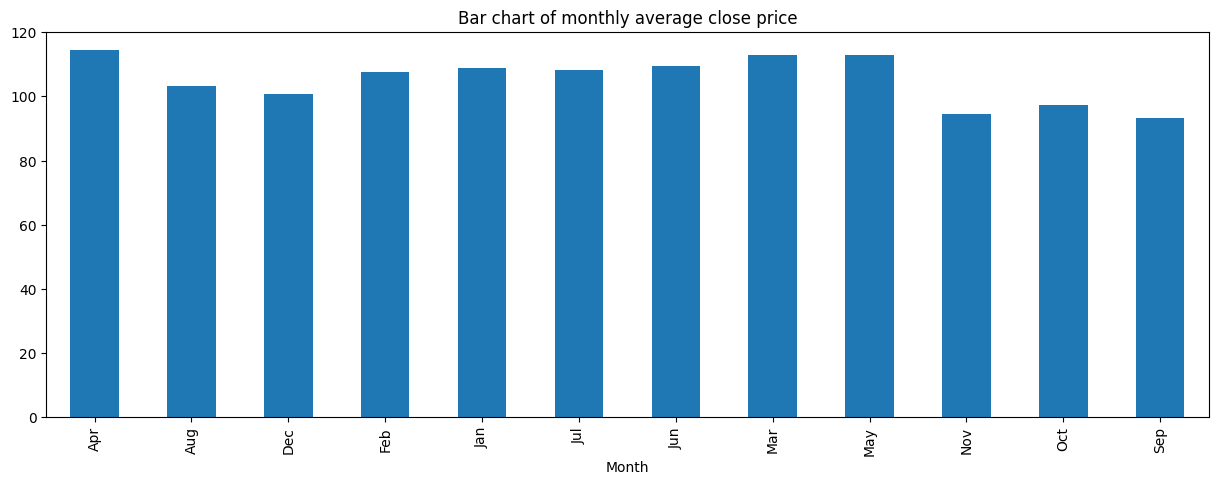

In [ ]:
#visualizing monthly average close price(Bivariate analysis)
plt.figure(figsize=(15,5))
plt.title('Bar chart of monthly average close price')

df_copy.groupby(['Month'])['Close'].mean().plot(kind='bar')
plt.show()

From the above bar chart we can conclude that the average close price was **high** in **April** and **low** in **November**

### What all manipulations have you done and insights you found?

created new column, checked for outliers, dropped unnecessary columns, created dataframe for every month.

We have found that prices are unstable or not constant, they go up and down every month.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: >

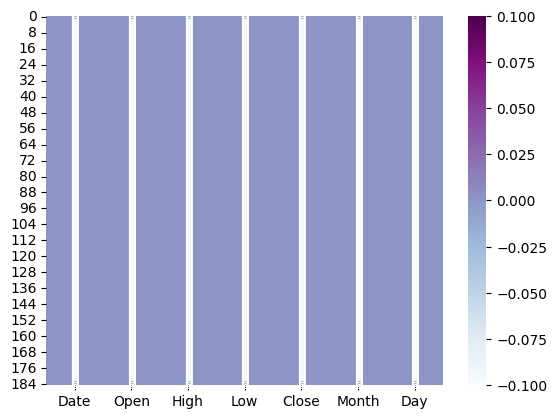

In [ ]:
# Chart - 1 visualization code
# Visualizing the missing values
sns.heatmap(df.isna(),annot=True,cmap='BuPu')

##### 1. Why did you pick the specific chart?

Heatmaps are often used to represent null values in data sets because they provide a visual way to quickly identify patterns and trends in the missing data.

##### 2. What is/are the insight(s) found from the chart?

There are no null values in the dataframe

#### Chart - 2

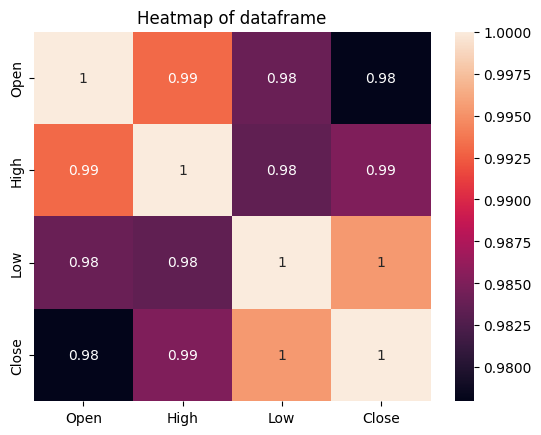

In [ ]:
# Chart - 2 visualization code
#visualising correlation between variables
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of dataframe')
plt.show()

##### 1. Why did you pick the specific chart?

 Heatmaps provide an intuitive visual representation of the relationships between variables in a correlation matrix. By using colors and gradients to represent the strength and direction of correlations, it becomes easier to identify patterns and associations in the data

##### 2. What is/are the insight(s) found from the chart?

all the features in the dataframe are highly co-related

#### Chart - 3

Pair plot of dataframe


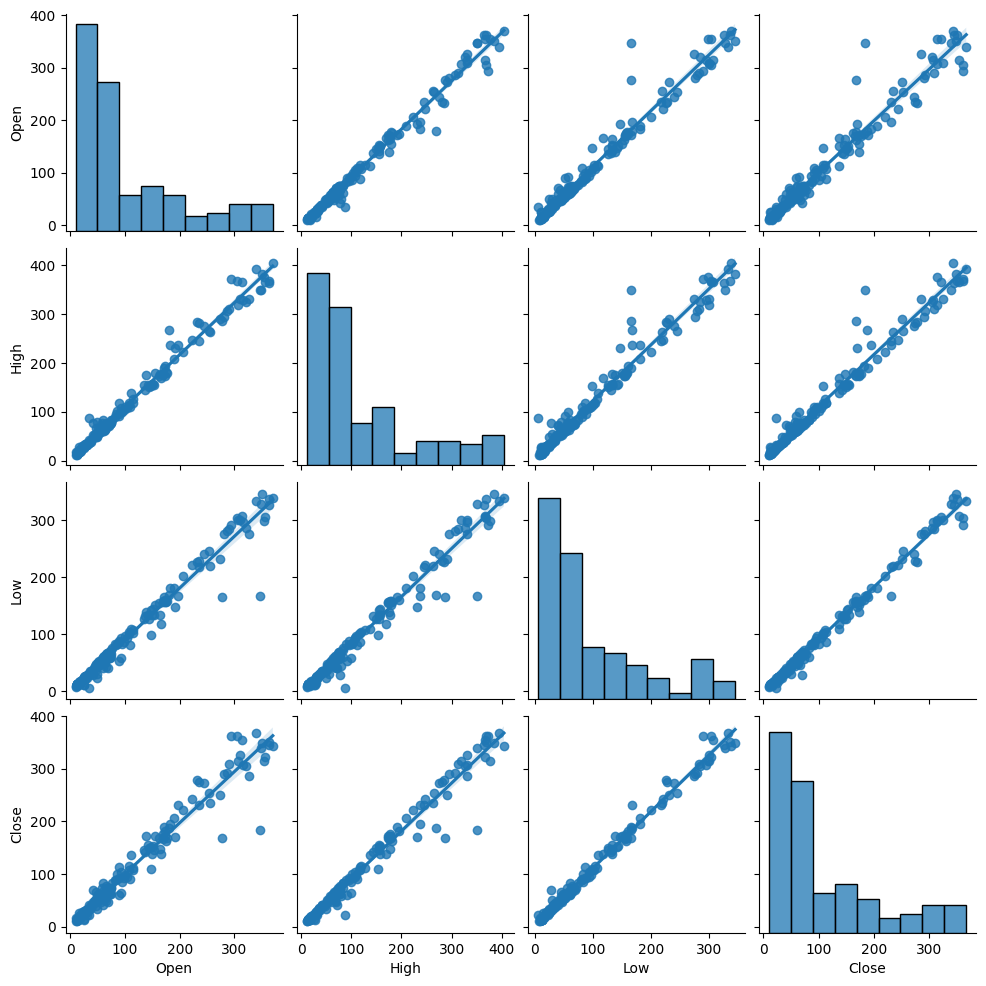

In [ ]:
# Chart - 3 visualization code
# Create a pair plot using Seaborn
print('Pair plot of dataframe')
sns.pairplot(df, kind='reg')

##### 1. Why did you pick the specific chart?

It is a grid of scatterplots and histograms that allows us to quickly examine pairwise relationships between numerical variables

##### 2. What is/are the insight(s) found from the chart?

data points are near to best fit line

#### Chart - 4

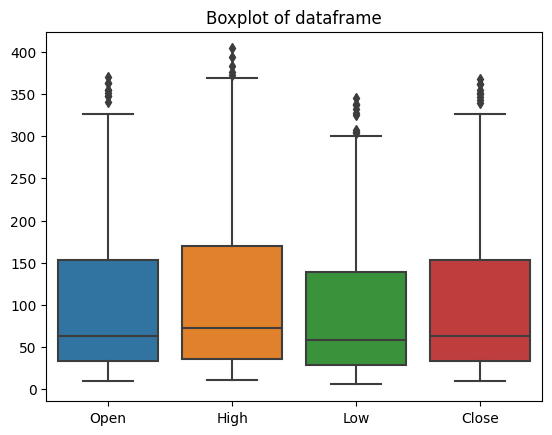

In [ ]:
# Chart - 4 visualization code
#visualing outliers in the dataframe
sns.boxplot(df)
plt.title('Boxplot of dataframe')
plt.show()

##### 1. Why did you pick the specific chart?

They offer a clear and concise way to visualize and summarize the distribution of data, making them essential for exploratory data analysis, hypothesis testing, and data-driven decision-making

##### 2. What is/are the insight(s) found from the chart?

outliers exist in every numeric column

#### Chart - 5

Distplot of Close variable 


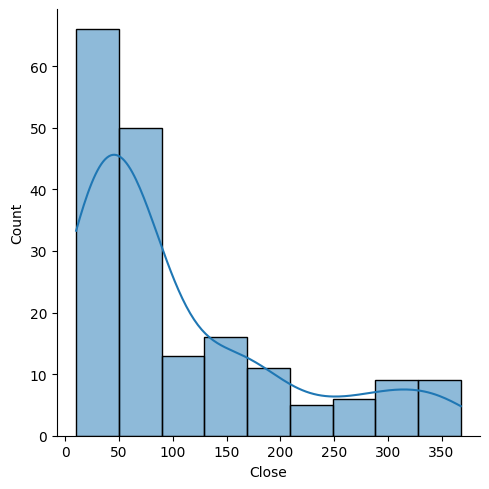

In [ ]:
# Chart - 5 visualization code
#univariate analaysis
print('Distplot of Close variable ')
sns.displot(df['Close'],kde=True)
plt.show()

##### 1. Why did you pick the specific chart?

They offer a clear and concise way to visualize and summarize the distribution of data, making them essential for exploratory data analysis, hypothesis testing, and data-driven decision-making


##### 2. What is/are the insight(s) found from the chart?

it is right skewed distribution

#### Chart - 6

Line chart of opening and Closing price


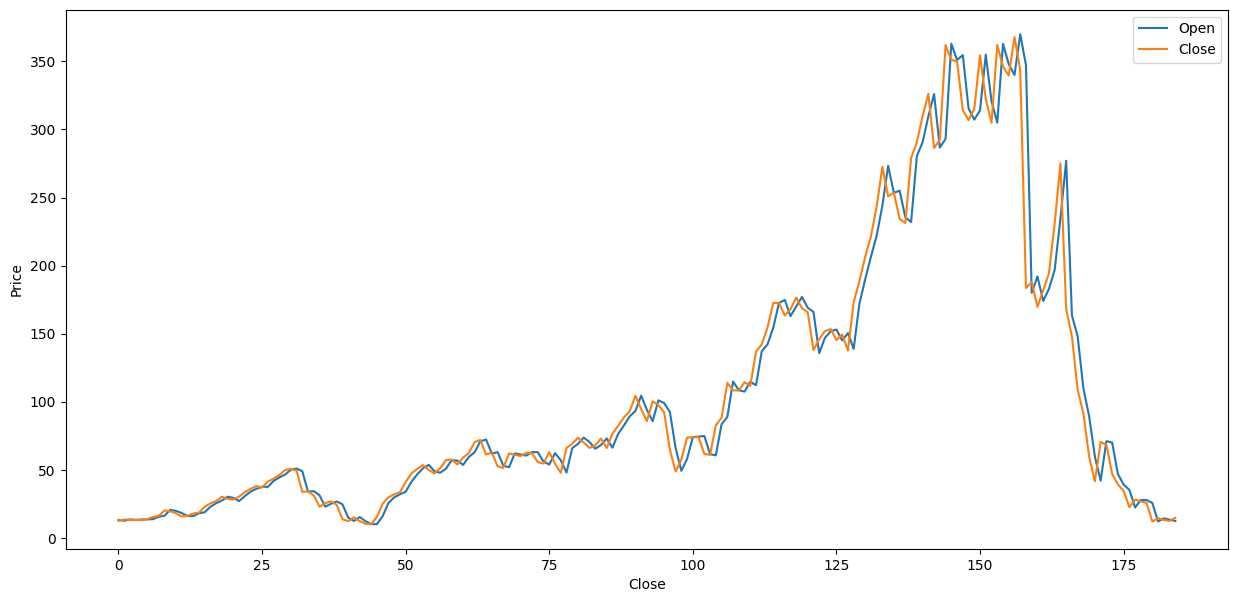

In [ ]:
# Chart - 6 visualization code

print('Line chart of opening and Closing price')
df[['Open','Close']].plot(figsize=(15,7))
plt.xlabel('Close')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

 When multiple features are plotted on the same line chart, it allows for several valuable analyses and insights


##### 2. What is/are the insight(s) found from the chart?

open price of (n+1)th day is near to close price of nth day

#### Chart - 7

Line chart of close and high price


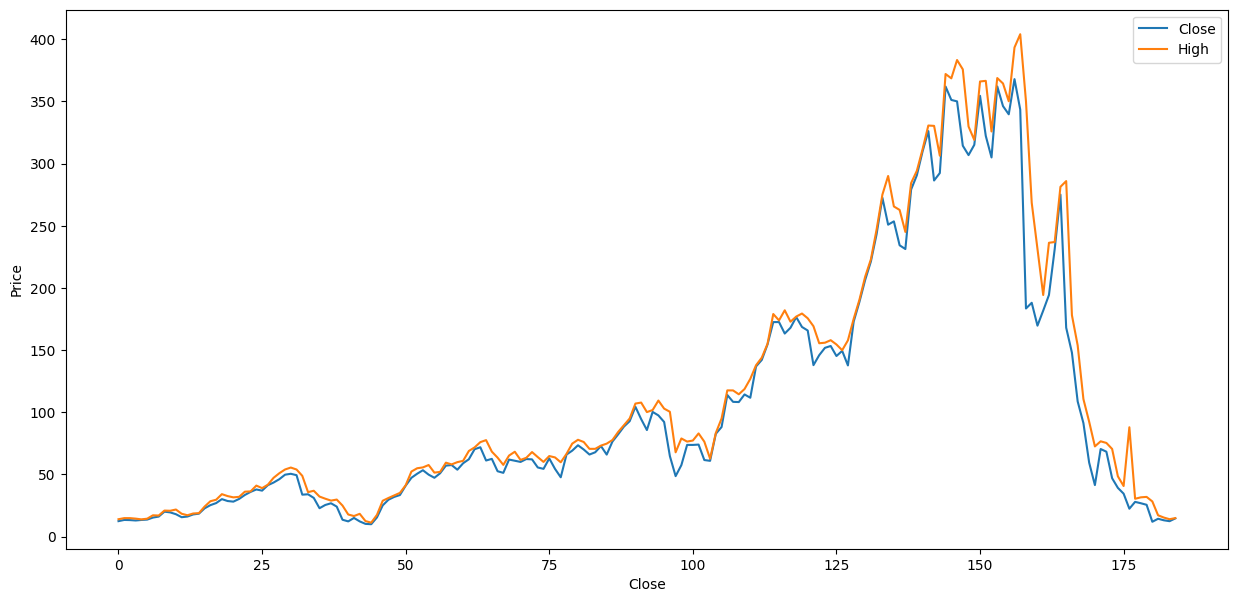

In [ ]:
# Chart - 7 visualization code

print('Line chart of close and high price')
df[['Close','High']].plot(figsize=(15,7))
plt.xlabel('Close')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

When multiple features are plotted on the same line chart, it allows for several valuable analyses and insights

##### 2. What is/are the insight(s) found from the chart?

in the peak times, the close price is less than high price

#### Chart - 8

Line chart of low and high price


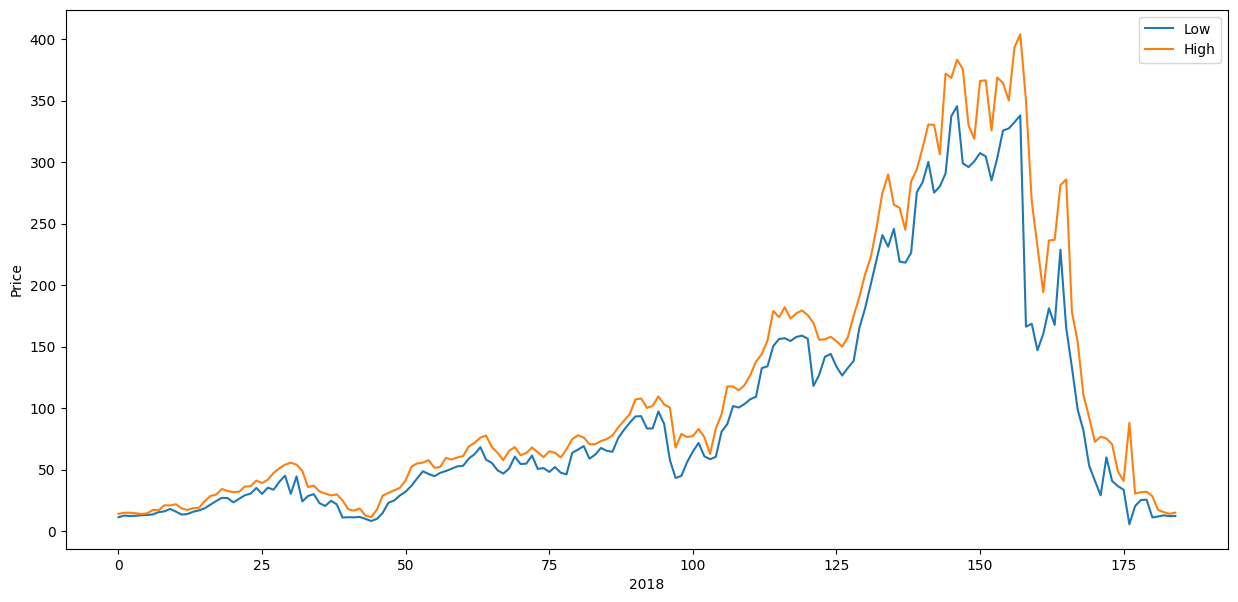

In [ ]:
# Chart - 8 visualization code

print('Line chart of low and high price')
df[['Low','High']].plot(figsize=(15,7))
plt.xlabel('2018')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

When multiple features are plotted on the same line chart, it allows for several valuable analyses and insights

##### 2. What is/are the insight(s) found from the chart?

In the peak time there is more difference  between low and high prices

#### Chart - 9

Line chart of low and Close price


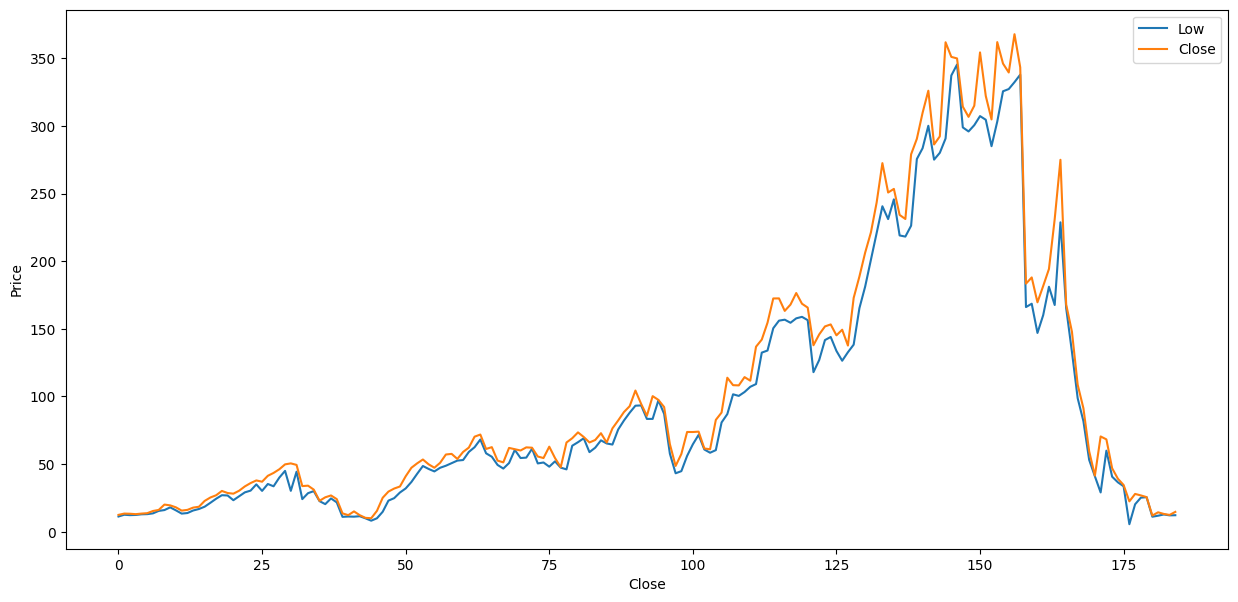

In [ ]:
# Chart - 9 visualization code

print('Line chart of low and Close price')
df[['Low','Close']].plot(figsize=(15,7))
plt.xlabel('Close')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

When multiple features are plotted on the same line chart, it allows for several valuable analyses and insights

##### 2. What is/are the insight(s) found from the chart?

in the falling time Close is almost equal to low

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
print('candlestick chart of stock prices ')
fig = go.Figure(data=[go.Candlestick(x=df_copy['Day'],
                  open=df_copy['Open'],
                  high=df_copy['High'],
                  low=df_copy['Low'],
                  close=df_copy['Close']
                                     )])
fig.show()

candlestick chart of stock prices 


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices fall and rise in every month

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
print('candlestick chart of stock prices in january')
chart(january_df)

candlestick chart of stock prices in january


In [ ]:
january_df.head()

,level_0,Date,Open,High,Low,Close,Month,Day
0,0,2018-01-06,13.68,17.16,13.58,15.33,Jan,1_Jan-06
1,1,2018-01-07,27.40,34.16,27.00,30.16,Jan,2_Jan-07
2,2,2018-01-08,49.99,55.56,30.24,50.54,Jan,3_Jan-08
3,3,2018-01-09,15.28,18.34,11.48,12.24,Jan,4_Jan-09
4,4,2018-01-10,53.60,57.58,46.42,49.84,Jan,5_Jan-10


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
print('candlestick chart of stock prices in february')
chart(february_df)

candlestick chart of stock prices in february


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
print('candlestick chart of stock prices in march')
chart(march_df)

candlestick chart of stock prices in march


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 14



In [ ]:
#candlestick chart of stock prices in april
print('candlestick chart of stock prices in april')
chart(april_df)

candlestick chart of stock prices in april


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 15

In [ ]:
#candlestick chart of stock prices in may
print('candlestick chart of stock prices in may')
chart(may_df)

candlestick chart of stock prices in may


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 16


In [ ]:
#candlestick chart of stock prices in june
print('candlestick chart of stock prices in june')
chart(june_df)

candlestick chart of stock prices in june


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 17

In [ ]:
#candlestick chart of stock prices in july
print('candlestick chart of stock prices in july')
chart(july_df)

candlestick chart of stock prices in july


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

####Chart - 18

In [ ]:
#'candlestick chart of stock prices in august'
print('candlestick chart of stock prices in august')
chart(august_df)

candlestick chart of stock prices in august


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 19

In [ ]:
#candlestick chart of stock prices in september
print('candlestick chart of stock prices in september')
chart(september_df)


candlestick chart of stock prices in september


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month





#### Chart - 20

In [ ]:
#candlestick chart of stock prices in october
print('candlestick chart of stock prices in october')
chart(october_df)

candlestick chart of stock prices in october


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 21

In [ ]:
#candlestick chart of stock prices in november
print('candlestick chart of stock prices in november')
chart(november_df)

candlestick chart of stock prices in november


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 22

In [ ]:
#candlestick chart of stock prices in december
print('candlestick chart of stock prices in december')
chart(december_df)

candlestick chart of stock prices in december


##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

prices are low in the starting of the month. They rise and reach higher price on reaching end of the month

#### Chart - 23

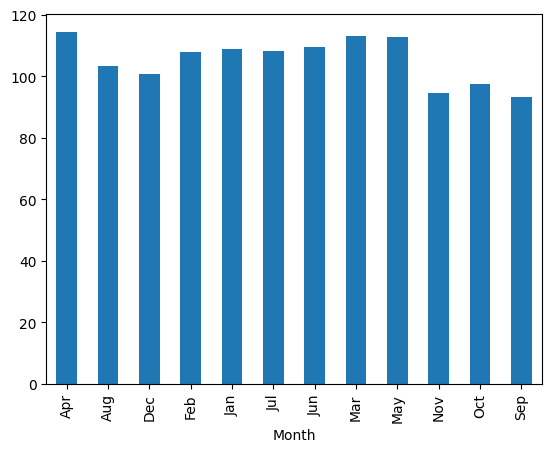

In [ ]:
#bar chart to visualize the monthly average close prices
df_copy.groupby(['Month'])['Close'].mean().plot(kind='bar')

# Display the bar chart
plt.show()

##### 1. Why did you pick the specific chart?

candlestick chart is one of the basic charts used for plotting stock prices

##### 2. What is/are the insight(s) found from the chart?

 From the above bar chart we can conclude that the average close price was **high** in **April** and **low** in **November**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define hypothetical statements from the dataset. In the next questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
import statsmodels.formula.api as smf

#fit the linear model
model = smf.ols(formula ='Open ~ Close',data = df_copy).fit()

#Check the P-value of coeffiecient
p_value = model.pvalues[1]
if p_value < 0.05:
  print("Reject Null Hypothesis. p_value=",p_value)
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis. p_value= 1.8527745058659732e-126


### Hypothetical Statement - 1

* On every month at end of the month we are seeing a rise and then fall in the closing price

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



**Null Hypothasis :** There is no difference between open and close stock price over the entire month

**Alternative Hypothsis :** On every month in the starting we are seeing stock opening at lower price



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The profit and loss directly depends on the stock price movement


#### 2. Perform an appropriate statistical test.

from the above function, we have obtained p_value=1.8527745058659732e-126

##### Which statistical test have you done to obtain P-Value?

we have done linear regression to obtain P-value

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Can impute numerical features with mean or median. But, surprisingly, No missing values are found in the dataset. So, there is no need of handling missing values.

### 2. Handling Outliers

few outliers exist in every column. But these outliers need not be handled as they are less than high fence

### 3. Categorical Encoding

No categoriacl features found in the given dataset

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

No categorical features found in the given dataset

#### 1. Feature Manipulation

need not perform feature manipulation and selection

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation is not requied for the given data as it is completely clear and ready to use it for further process

### 6. Data Scaling

Data scaling is not very much required as outliers are not above the range of high fence

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

need not perform Dimensionality reduction as features are less and sufficient

### 8. Data Splitting

In [ ]:
# 5 fold time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)


In [ ]:
#seperating independent and dependent variables
independent_variables=[ 'Open', 'High', 'Low']
print("Independent_variables:",independent_variables)

dependent_variable='Close'
print("Dependent_variable:",dependent_variable)

Independent_variables: ['Open', 'High', 'Low']
Dependent_variable: Close


In [ ]:
#veiwing x and y.
x=df_copy[independent_variables]
y=df_copy[dependent_variable]
print(x)
print(y)

       Open    High     Low
0     13.68   17.16   13.58
1     27.40   34.16   27.00
2     49.99   55.56   30.24
3     15.28   18.34   11.48
4     53.60   57.58   46.42
..      ...     ...     ...
180  153.00  154.52  133.71
181  235.40  245.00  218.25
182  307.20  319.00  300.65
183  174.00  194.30  160.20
184   70.00   70.50   40.70

[185 rows x 3 columns]
0       15.33
1       30.16
2       50.54
3       12.24
4       49.84
        ...  
180    145.23
181    231.26
182    315.05
183    181.75
184     46.95
Name: Close, Length: 185, dtype: float64


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3,)

In [ ]:
#printing x_train dataframe
print(x_train)

       Open    High     Low
31    29.30   31.58   23.31
108   37.50   39.00   30.20
5     62.98   63.54   49.39
170   13.49   14.44   13.00
168   71.00   75.35   59.95
..      ...     ...     ...
21    65.90   74.80   63.60
0     13.68   17.16   13.58
131  114.60  126.85  107.18
152   42.00   76.65   29.05
106   12.58   14.88   12.55

[138 rows x 3 columns]


In [ ]:
#printing x_test dataframe
print(x_test)

       Open    High     Low
25   150.40  157.85  132.74
3     15.28   18.34   11.48
73   163.30  178.05  133.05
171   25.40   29.66   24.40
47    33.90   35.80   28.51
112   62.90   63.96   50.51
6     47.92   66.50   46.11
146   58.00   76.44   56.08
82    99.00  102.94   87.15
64    56.94   58.08   50.66
102  293.04  372.00  290.78
151  180.00  268.45  168.60
38    60.52   83.36   60.34
128   56.00   60.08   51.20
4     53.60   57.58   46.42
46    27.00   31.99   26.20
178   74.40   83.00   71.63
78    25.60   31.08   23.00
120   89.20   92.40   53.15
92    35.98   41.04   35.02
15    15.50   16.97   15.40
156   44.40   50.98   40.02
105   25.60   28.30   11.10
179  142.08  155.00  134.00
173   12.40   16.56   11.13
23    61.54   62.70   58.42
126   33.80   41.30   32.00
40   138.80  175.12  138.35
70   189.80  209.00  181.28
103  340.00  393.35  332.45
141   24.60   25.00   11.01
34    47.80   52.06   47.30
135  347.20  350.00  166.15
122   13.48   14.87   12.27
98    92.40  100.40 

In [ ]:
#printing y_train dataframe
print(y_train)

31      28.14
108     36.99
5       52.59
170     13.71
168     68.30
        ...  
21      69.14
0       15.33
131    111.70
152     70.45
106     13.42
Name: Close, Length: 138, dtype: float64


In [ ]:
#printing x_test dataframe
print(x_test)

       Open    High     Low
25   150.40  157.85  132.74
3     15.28   18.34   11.48
73   163.30  178.05  133.05
171   25.40   29.66   24.40
47    33.90   35.80   28.51
112   62.90   63.96   50.51
6     47.92   66.50   46.11
146   58.00   76.44   56.08
82    99.00  102.94   87.15
64    56.94   58.08   50.66
102  293.04  372.00  290.78
151  180.00  268.45  168.60
38    60.52   83.36   60.34
128   56.00   60.08   51.20
4     53.60   57.58   46.42
46    27.00   31.99   26.20
178   74.40   83.00   71.63
78    25.60   31.08   23.00
120   89.20   92.40   53.15
92    35.98   41.04   35.02
15    15.50   16.97   15.40
156   44.40   50.98   40.02
105   25.60   28.30   11.10
179  142.08  155.00  134.00
173   12.40   16.56   11.13
23    61.54   62.70   58.42
126   33.80   41.30   32.00
40   138.80  175.12  138.35
70   189.80  209.00  181.28
103  340.00  393.35  332.45
141   24.60   25.00   11.01
34    47.80   52.06   47.30
135  347.20  350.00  166.15
122   13.48   14.87   12.27
98    92.40  100.40 

##### What data splitting ratio have you used and why?

We have used 75%-25% splitting ratio as simpler models require less data for testing which is enough and efficient in most of the cases

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is slightly imbalenced. But Stock price prediction is often inherently imbalanced because stock prices tend to exhibit long periods of stability punctuated by short periods of volatility. In such cases, imbalanced data is expected, and balancing it may not be necessary.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
lr=LinearRegression()

# Fit the Algorithm
lr.fit(x_train,y_train)

# Predict on the model
y_pred=lr.predict(x_test)
print(y_pred)

[142.70522792  15.0057848  148.98687861  28.59127393  31.79078211
  54.43829453  59.71997641  69.79150604  93.46591117  53.95809774
 346.48589627 229.08916909  76.68053656  56.17843     51.51724696
  30.85673704  79.56653666  28.10721582  61.10570598  39.89463011
  17.58873324  46.31473877  15.5899855  146.33320602  15.05384288
  61.51495589  38.4388754  164.52193576 198.42233708 373.49091412
  13.960243    51.84119499 192.06266275  14.47735193  68.59233686
 337.7566381   73.37412396 187.25716279 289.38060573  23.23073135
  56.02099425 143.62146465 232.80258964  25.59305015  48.8273795
 298.30230729 303.49106945]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error=',mae)

#finding r2_score
r2=r2_score(y_test,y_pred)
print('r2 score=',r2)

#calculating adjusted
adjusted_r2=1 - (1 - r2) * ((len(y) -1)/(len(y) - len(independent_variables) - 1))
print('adjusted_r2 score=',adjusted_r2)

Mean absolute error= 4.446958553836921
r2 score= 0.9939317201207872
adjusted_r2 score= 0.9938311408962699


### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
eln=ElasticNetCV(cv=tscv)
# Fit the Algorithm
eln.fit(x_train,y_train)
# Predict on the model
y_pred=eln.predict(x_test)
print('y_pred=',y_pred)


y_pred= [145.52947711  15.95184751 155.12571874  28.10312531  33.15405036
  57.99328809  56.8409969   66.78026567  95.66438697  55.3275929
 329.50247417 216.22588348  72.27508992  56.54836994  52.84093392
  30.14756614  78.10669599  28.02214883  72.67503613  39.06015954
  17.39533887  46.35828831  20.40029365 144.86837962  14.93475894
  61.60849094  37.57667729 156.5741914  195.20667912 361.61504411
  18.81167615  50.73125896 253.00010265  14.7515025   78.83354387
 338.71113267  73.54587457 222.61971987 301.72645141  22.41846086
  58.68495975 141.38191716 240.38704486  28.35248347  50.0819417
 304.91296827 297.47177023]


In [ ]:
# Visualizing evaluation Metric Score
#finding mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error=',mae)

#finding r2_score
r2=r2_score(y_test,y_pred)
print('r2 score=',r2)


#calculating adjusted r2 score
adjusted_r2=1 - (1 - r2) * ((len(y) -1)/(len(y) - len(independent_variables) - 1))
print('adjusted_r2 score=',adjusted_r2)

Mean absolute error= 8.457556347366232
r2 score= 0.9761938235567641
adjusted_r2 score= 0.9757992460466552


#### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
rf=RandomForestRegressor()
# Fit the Algorithm
rf.fit(x_train,y_train)
# Predict on the model
y_pred=rf.predict(x_test)
print(y_pred)

[147.354   13.6733 156.1801  26.4948  32.9535  56.6265  52.9118  64.1438
  96.988   55.1637 317.5494 225.1802  64.3703  55.2318  50.8423  26.6653
  74.7872  26.3165  74.3729  36.9362  16.4871  46.0763  23.8574 146.5238
  13.8353  61.2643  37.2768 156.4989 194.3584 346.8575  19.6845  49.2525
 274.8786  13.1984  76.3944 343.4455  71.7541 252.5125 307.3744  19.7382
  57.7866 146.7861 250.3864  27.8028  49.3796 305.7289 296.4127]


In [ ]:
# Visualizing evaluation Metric Score chart
#finding mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error=',mae)

#finding r2_score
r2=r2_score(y_test,y_pred)
print('r2 score=',r2)


#calculating adjusted r2 score
adjusted_r2=1 - (1 - r2) * ((len(y) -1)/(len(y) - len(independent_variables) - 1))
print('adjusted_r2 score=',adjusted_r2)

Mean absolute error= 10.995238297872316
r2 score= 0.9547121734724632
adjusted_r2 score= 0.9539615465134432


### ML Model - 4

In [ ]:
# ML Model - 4 Implementation

xgb=XGBRegressor()
# Fit the Algorithm
xgb.fit(x_train,y_train)
# Predict on the model
y_pred=xgb.predict(x_test)
print('y_pred=',y_pred)

y_pred= [143.09824   12.318892 159.96202   25.92029   33.22987   52.59952
  56.309223  62.938854  95.8306    52.17857  306.5298   227.45464
  67.92395   55.098763  51.516464  26.234926  75.09677   25.30441
  73.76036   36.843246  15.652243  42.882732  16.276438 142.03218
  13.869074  61.212433  36.128075 156.07437  194.2885   350.62424
  16.276438  47.94346  296.21118   12.894145  73.625114 349.76486
  70.08334  248.7951   306.79617   18.35532   54.50263  144.92464
 238.9396    27.020678  47.484844 304.6976   292.34628 ]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score
#finding mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error=',mae)

#finding r2_score
r2=r2_score(y_test,y_pred)
print('r2 score=',r2)

#calculating adjusted r2 score
adjusted_r2=1 - (1 - r2) * ((len(y) -1)/(len(y) - len(independent_variables) - 1))
print('adjusted_r2 score=',adjusted_r2)

Mean absolute error= 11.379582814155738
r2 score= 0.9452840178892804
adjusted_r2 score= 0.9443771231581635


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],

}
gsv= GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the Algorithm
gsv.fit(x_train,y_train)
# Predict on the model
y_pred=gsv.predict(x_test)
print('y_pred=',y_pred)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
y_pred= [147.80629   13.492465 164.49396   26.073437  30.561886  55.26943
  52.452835  61.296402  99.46678   52.820522 320.73856  217.32033
  66.90281   57.28822   50.322586  27.849144  73.437546  25.283154
  77.967834  33.211708  17.670559  44.68855   15.998134 146.62051
  13.396467  60.59939   33.42821  163.93213  189.87291  350.0131
  15.998134  49.350704 306.87787   13.646747  78.64129  346.13593
  70.8059   251.1376   305.80145   20.18583   58.421852 144.19798
 236.01033   25.468935  49.05182  302.50064  292.59708 ]


In [ ]:
# Visualizing evaluation Metric Score chart
#finding mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error=',mae)

#finding r2_score
r2=r2_score(y_test,y_pred)
print('r2 score=',r2)

#calculating adjusted r2 score
adjusted_r2=1 - (1 - r2) * ((len(y) -1)/(len(y) - len(independent_variables) - 1))
print('adjusted_r2 score=',adjusted_r2)

Mean absolute error= 11.552137288844326
r2 score= 0.942747417318022
adjusted_r2 score= 0.9417984794835141


##### Which hyperparameter optimization technique have you used and why?

we used gridsearchcv as it systematically searches through a predefined set of hyperparameter values to find the best combination.It simplifies the hyperparameter tuning process, making it more systematic, efficient, and reliable by selecting the best combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvements found

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

we have considered mean_absolute_error as it is less sensitive to outliers compared to metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE). This makes it a suitable choice when the dataset contains outliers or when you want to assess model performance without being heavily influenced by extreme values.<br>

r2_score and adjusted_r2 score gives precise model accuracy score

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose XGBRegressor as it gave us the best and good accuracy:<br>
r2 score= 0.9452840178892804<BR>
adjusted_r2 score= 0.9443771231581635<br>
and <br>
low error: Mean absolute error= 11.37<br>
More over, tree based algorithms are good at handling outliers. XGBRegressor, being a tree based algorithm has handled outiers too.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#installing shap
!pip install shap

In [ ]:
#importing shap library
import shap


In [ ]:
# Use the best estimator with TreeExplainer
shap.initjs()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_train)

In [ ]:
#creating functions 'show_force_plot()' and 'show_feature_importance_by_best_model()'
shap.initjs()


def show_force_plot(n_plots = 5):
    for i in range(0, n_plots):
        index =np.random.randint(0,len(shap_values))
        shap.force_plot(explainer.expected_value, shap_values[index], features=x_train.iloc[index], feature_names=x_train.columns, matplotlib=True)


def show_feature_importance_by_best_model():
    plt.subplot(1,1,1)
    shap.summary_plot(shap_values = shap_values, features = x_train, feature_names = x_train.columns, plot_size=None)
    plt.subplot(1,2,1)
    shap.summary_plot(shap_values = shap_values, features = x_train, feature_names = x_train.columns, plot_type='bar', plot_size=None)

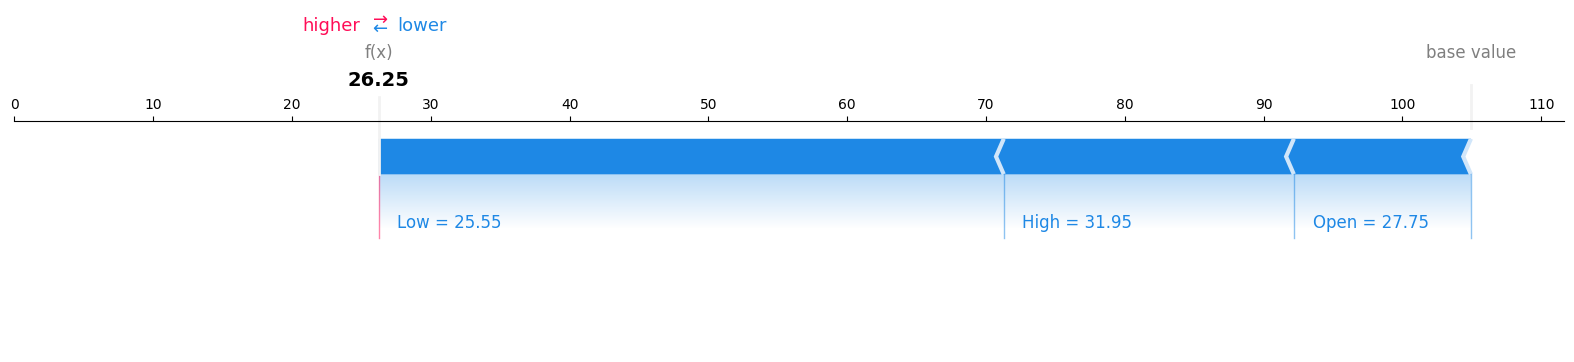

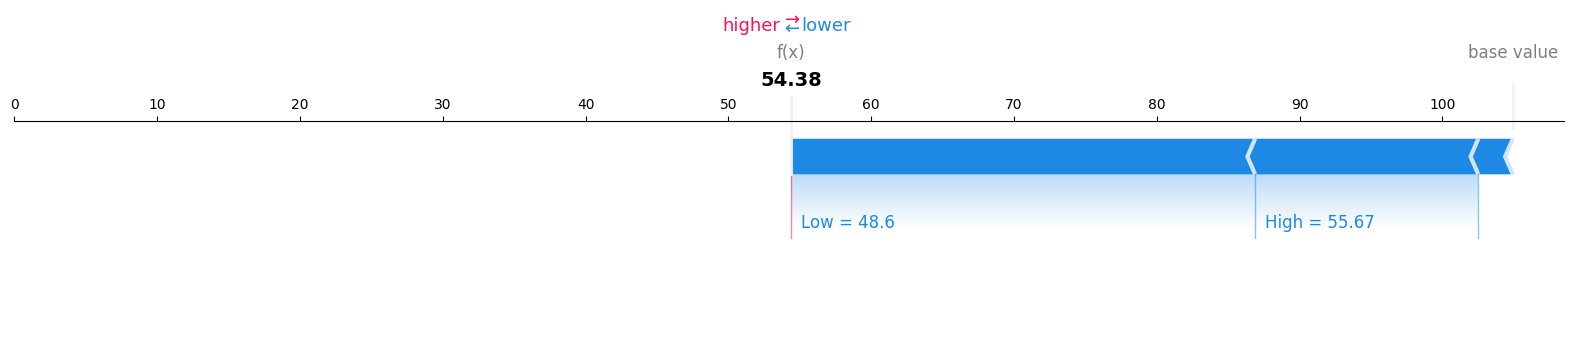

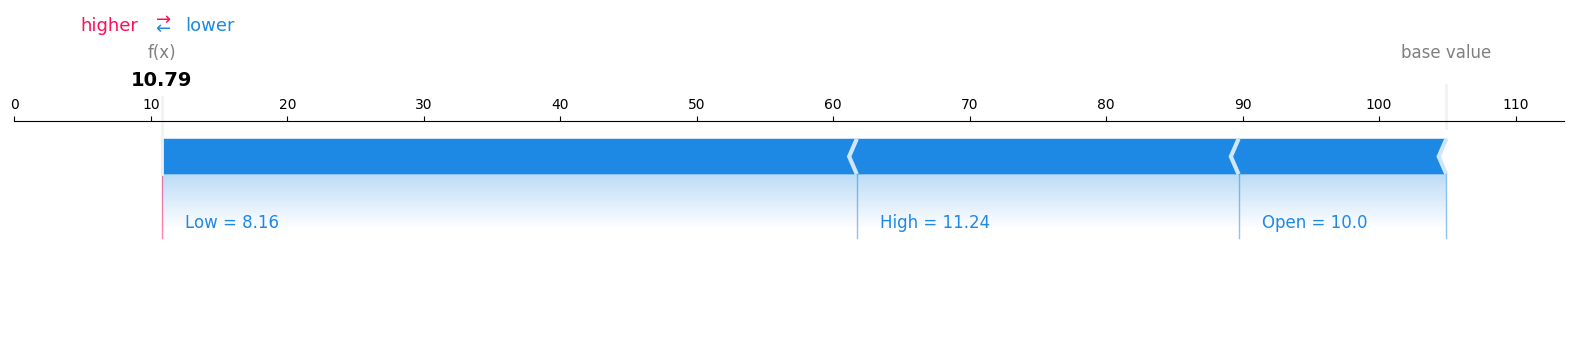

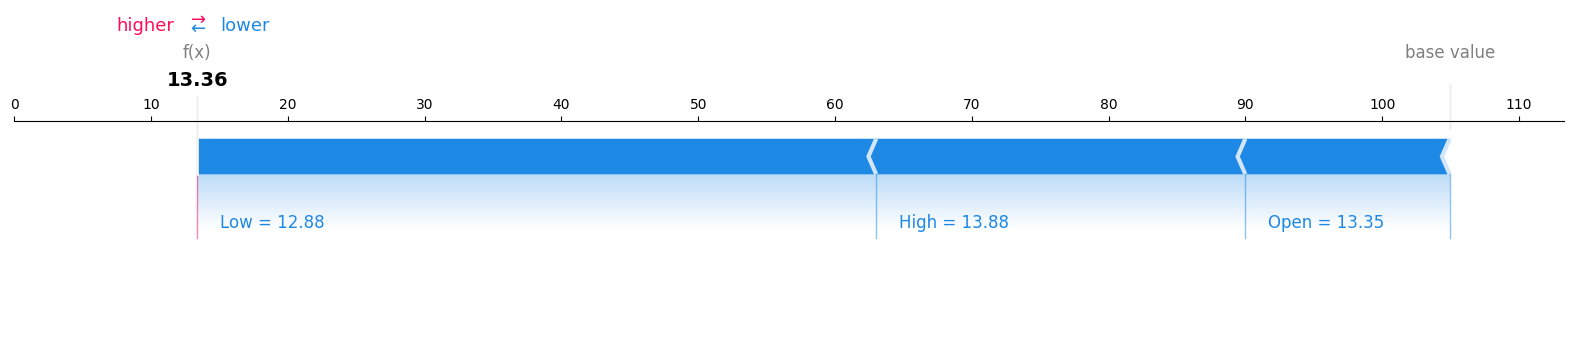

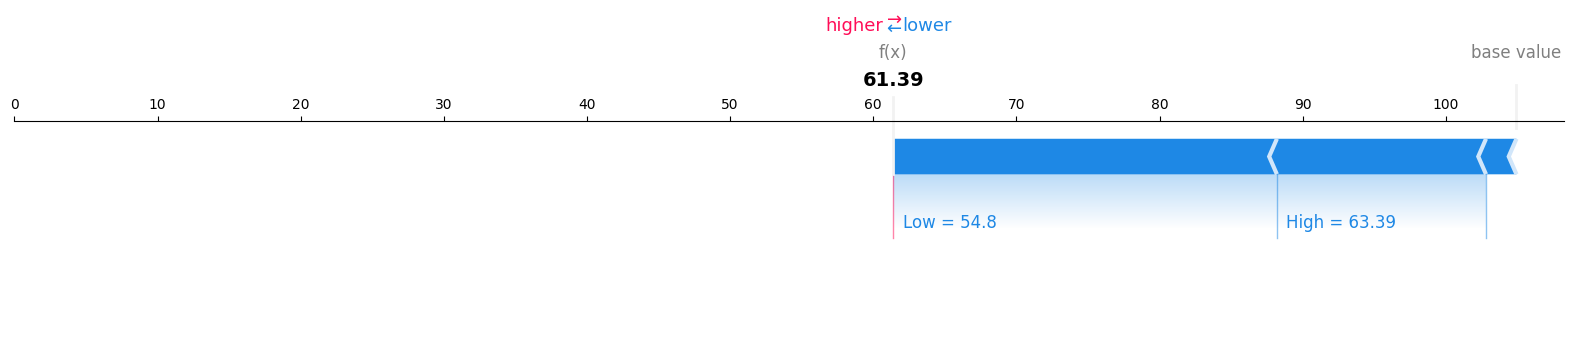

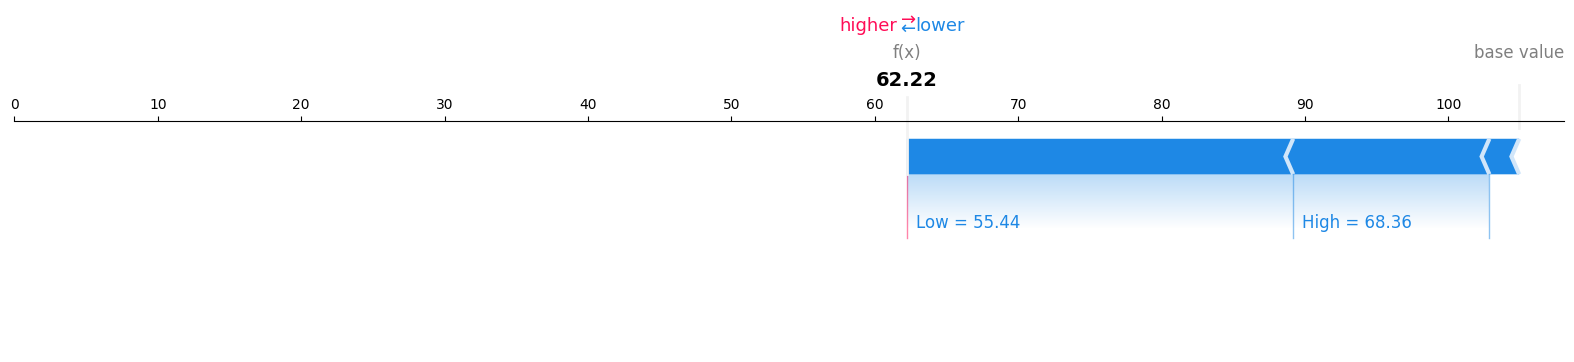

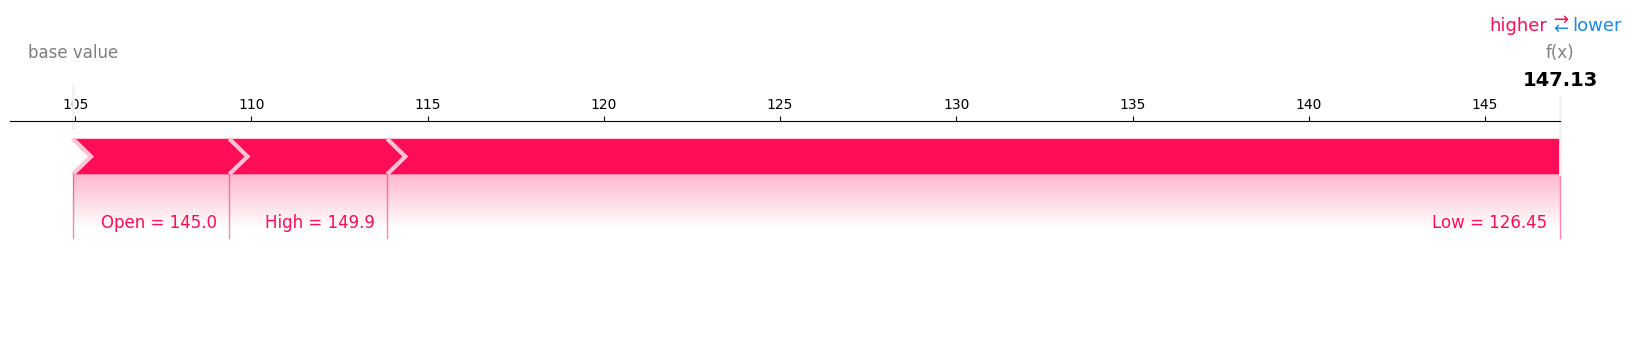

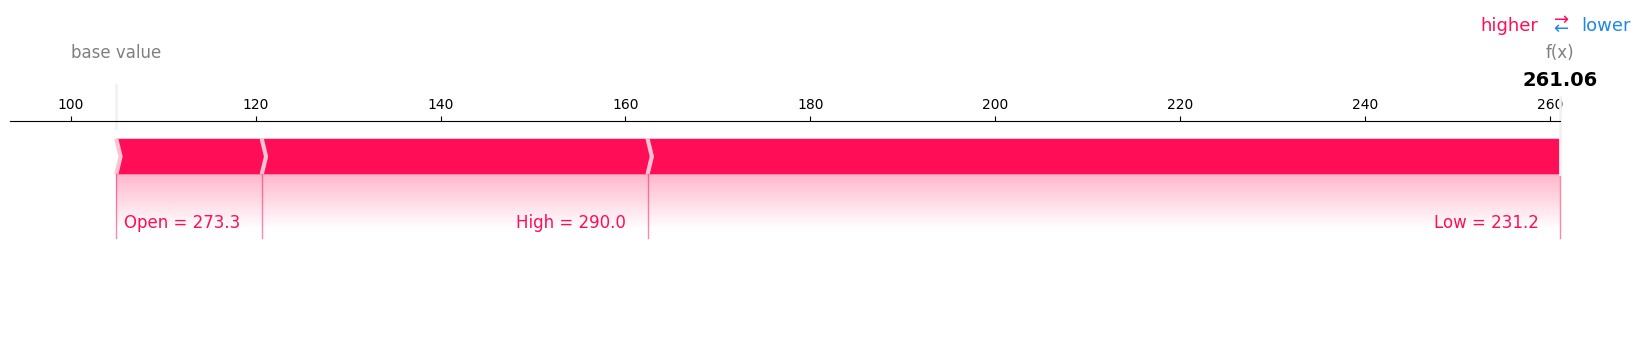

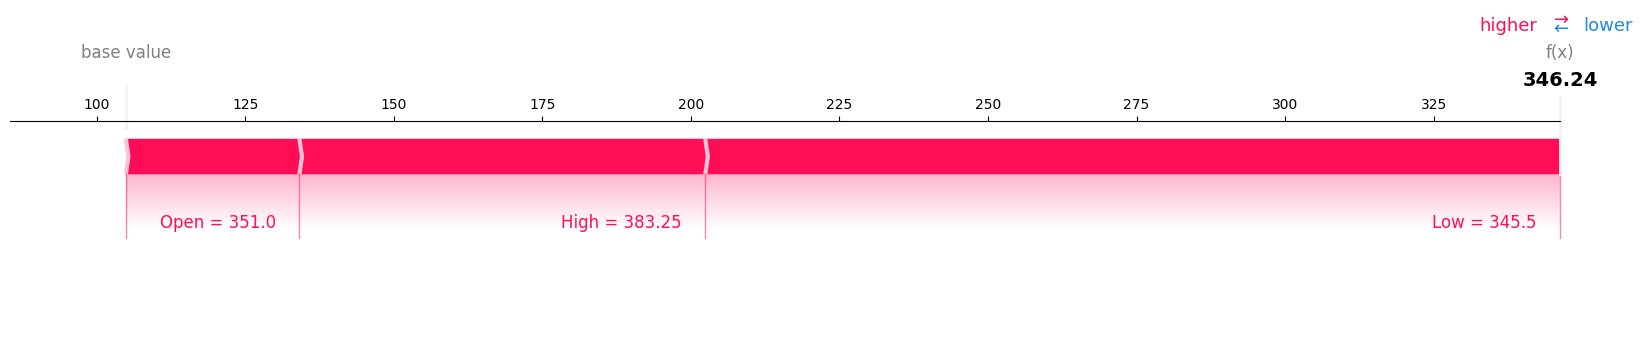

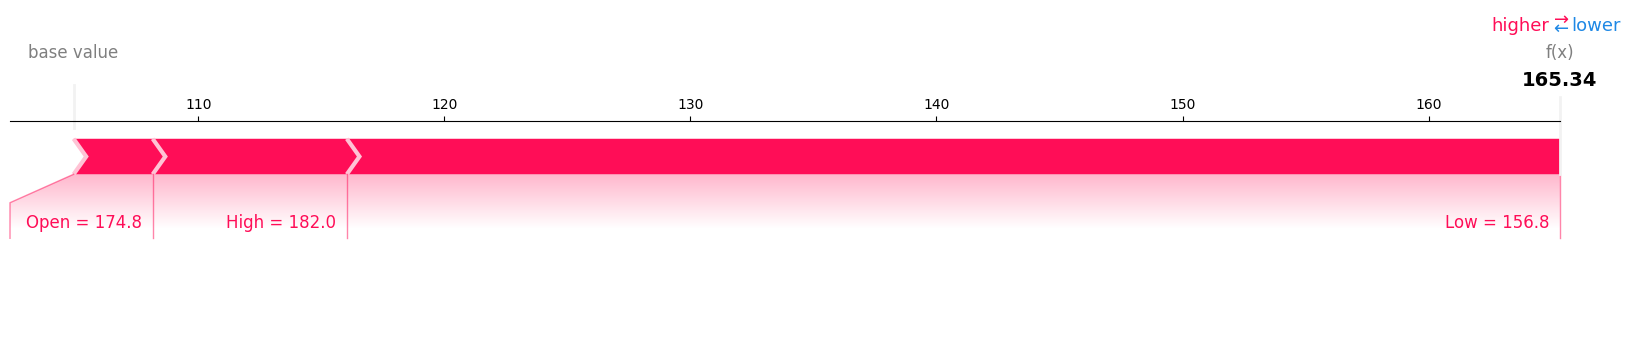

In [ ]:
#calling show_force_plot()
show_force_plot(10)

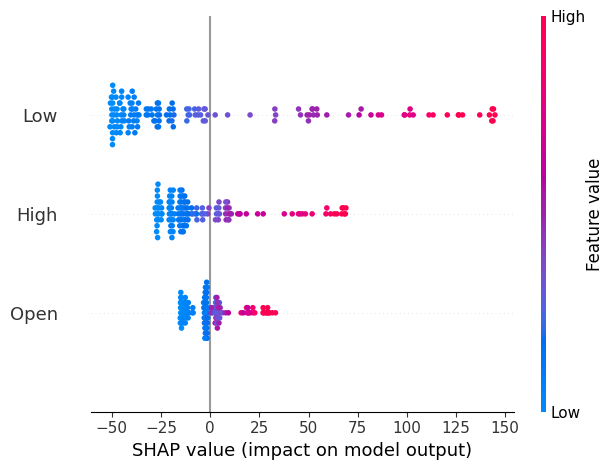

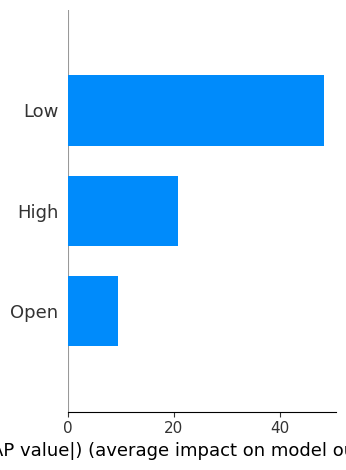

In [ ]:
#calling def show_feature_importance_by_best_model()
show_feature_importance_by_best_model()

# **Conclusion**


+ Linear Regression has the lowest Mean Absolute Error (4.45), indicating it has the smallest average absolute difference between predicted and actual values,has the highest R-squared (R2) Score (0.994) which indicates over fitting.
+ Linear Regression also has the R-squared (R2) Score (0.955), suggesting that it explains a significant portion of the variance in the data.
+ ElasticNetCV and Random Forest Regressor perform well with relatively low Mean Absolute Errors (8.46 and 10.99, respectively) and high R2 scores (0.976 and 0.955, respectively).
+ XGBoost Regressor and GridSearchCV show slightly higher Mean Absolute Errors and lower R2 scores compared to the other models, but they still provide reasonable performance.

 The choice of the best model depends on the specific problem, data, and the trade-off between model complexity and performance. <br>In this case, XGBRegressor appears to have the best balance of low error(Mean Absolute Error:11.379582814155738<br>
r2 score= 0.9452840178892804<br>
adjusted_r2 score= 0.9443771231581635 <br>and high R2 score, making it a strong candidate for modeling the data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***